In [2]:
import sys
sys.path.append('/home/jhsia2/ragged')
from file_utils import load_json, load_jsonl

# Histogram of the indices where there is a paragraph and page match

In [10]:
import matplotlib.pyplot as plt
import numpy as np

def histogram_match_index(dataset):
    # Load results for colbert and bm25
    colbert_results = load_jsonl(f'/data/tir/projects/tir6/general/afreens/dbqa/retriever_results/evaluations/colbert/{dataset}.jsonl')
    bm25_results = load_jsonl(f'/data/tir/projects/tir6/general/afreens/dbqa/retriever_results/evaluations/bm25/{dataset}.jsonl')

    # Process colbert results to get combined list
    colbert_match_indices = [np.where([p['page_par_id_match'] for p in r['passage-level results']])[0] for r in colbert_results]
    colbert_combined_list = [item for array in colbert_match_indices if array.size > 0 for item in array]

    # Process bm25 results to get combined list
    bm25_match_indices = [np.where([p['page_par_id_match'] for p in r['passage-level results']])[0] for r in bm25_results]
    bm25_combined_list = [item for array in bm25_match_indices if array.size > 0 for item in array]

    # Plot histogram for colbert
    num_bins = 50
    plt.hist(colbert_combined_list, bins=num_bins, edgecolor='black', alpha=0.7, label='colbert')

    # Plot histogram for bm25
    plt.hist(bm25_combined_list, bins=num_bins, edgecolor='black', alpha=0.7, label='bm25')

    # Adding labels and title
    plt.xlabel('Number')
    plt.xlim(left = 0, right = 50)
    plt.ylabel('Frequency')
    plt.title('Histogram of paragraph match index for Colbert and BM25')

    # Adding legend
    plt.legend()

    # Show the plot
    plt.show()

    # Process colbert results to get combined list
    colbert_match_indices = [np.where([p['page_id_match'] for p in r['passage-level results']])[0] for r in colbert_results]
    colbert_combined_list = [item for array in colbert_match_indices if array.size > 0 for item in array]

    # Process bm25 results to get combined list
    bm25_match_indices = [np.where([p['page_id_match'] for p in r['passage-level results']])[0] for r in bm25_results]
    bm25_combined_list = [item for array in bm25_match_indices if array.size > 0 for item in array]

    # Plot histogram for colbert
    num_bins = 50
    plt.hist(colbert_combined_list, bins=num_bins, edgecolor='black', alpha=0.7, label='colbert')

    # Plot histogram for bm25
    plt.hist(bm25_combined_list, bins=num_bins, edgecolor='black', alpha=0.7, label='bm25')

    # Adding labels and title
    plt.xlabel('Number')
    plt.xlim(left = 0, right = 50)
    plt.ylabel('Frequency')
    plt.title('Histogram of page match index for Colbert and BM25')

    # Adding legend
    plt.legend()

    # Show the plot
    plt.show()

loading from /data/tir/projects/tir6/general/afreens/dbqa/retriever_results/evaluations/colbert/hotpotqa-dev-kilt.jsonl
loading from /data/tir/projects/tir6/general/afreens/dbqa/retriever_results/evaluations/bm25/hotpotqa-dev-kilt.jsonl


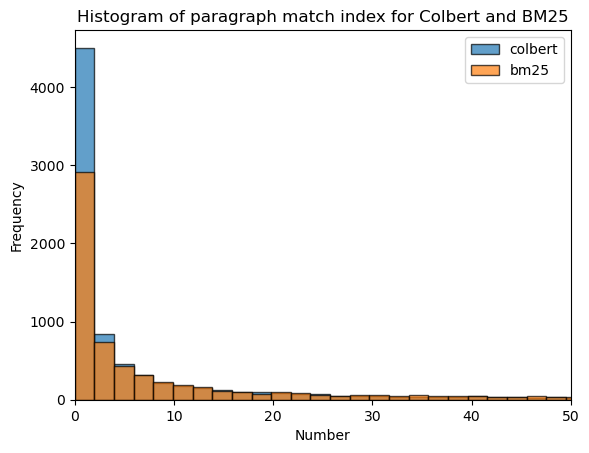

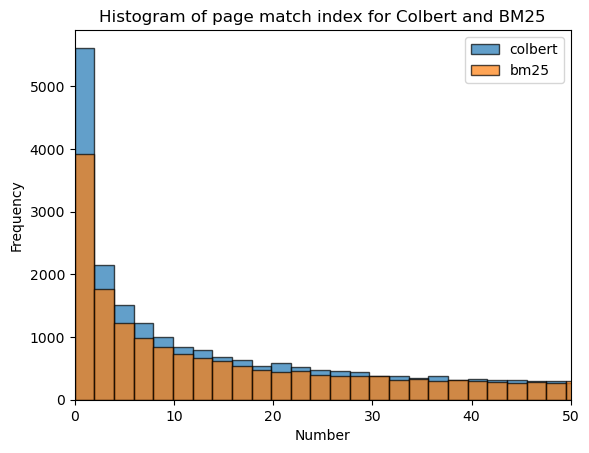

In [11]:
dataset = 'hotpotqa-dev-kilt'
histogram_match_index(dataset)

loading from /data/tir/projects/tir6/general/afreens/dbqa/retriever_results/evaluations/colbert/complete_bioasq.jsonl
loading from /data/tir/projects/tir6/general/afreens/dbqa/retriever_results/evaluations/bm25/complete_bioasq.jsonl


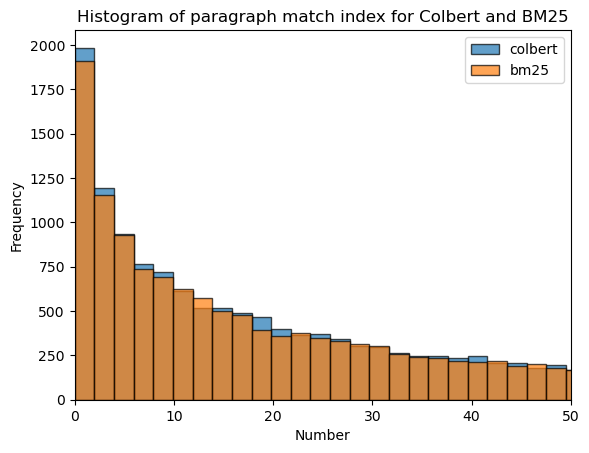

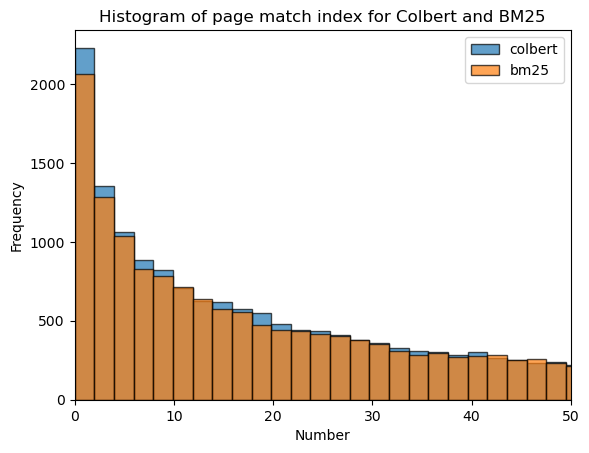

In [12]:
dataset = 'complete_bioasq'
histogram_match_index(dataset)

# Overlap in retrieved documents

loading from /data/tir/projects/tir6/general/afreens/dbqa/retriever_results/evaluations/colbert/hotpotqa-dev-kilt.jsonl
loading from /data/tir/projects/tir6/general/afreens/dbqa/retriever_results/evaluations/bm25/hotpotqa-dev-kilt.jsonl


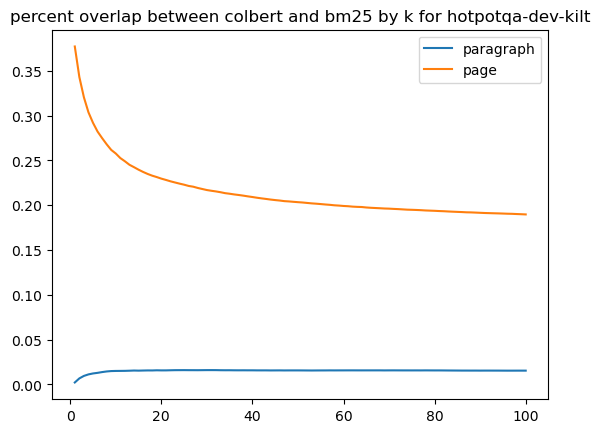

In [13]:
def retriever_overlap(dataset):
    colbert_results = load_jsonl(f'/data/tir/projects/tir6/general/afreens/dbqa/retriever_results/evaluations/colbert/{dataset}.jsonl')
    bm25_results = load_jsonl(f'/data/tir/projects/tir6/general/afreens/dbqa/retriever_results/evaluations/bm25/{dataset}.jsonl')
    overlap_par_by_k = {}
    overlap_page_by_k = {}
    for k in range(1,101):
        overlap_par_by_k[k] = []
        overlap_page_by_k[k] = []
    for c,b in zip(colbert_results, bm25_results):
        if c['id']!= b['id']:
            print('error')
        c_par_ids = [p['page_par_id'] for p in c['passage-level results']]
        c_page_ids = [p['page_id'] for p in c['passage-level results']]
        b_par_ids = [p['page_par_id'] for p in b['passage-level results']]  
        b_page_ids = [p['page_id'] for p in b['passage-level results']]
        for k in range(1,101):
            overlap_par_by_k[k].append(len(set(c_par_ids[:k]).intersection(set(b_par_ids[:k]))))
            overlap_page_by_k[k].append(len(set(c_page_ids[:k]).intersection(set(b_page_ids[:k]))))
    import matplotlib.pyplot as plt
    import numpy as np
    plt.plot(overlap_par_by_k.keys(), [np.mean(overlap_par_by_k[k])/k for k in overlap_par_by_k.keys()], label = 'paragraph')
    plt.plot(overlap_page_by_k.keys(), [np.mean(overlap_page_by_k[k])/k for k in overlap_page_by_k.keys()], label = 'page')
    plt.legend()
    plt.title(f'percent overlap between colbert and bm25 by k for {dataset}')   

loading from /data/tir/projects/tir6/general/afreens/dbqa/retriever_results/evaluations/colbert/hotpotqa-dev-kilt.jsonl
loading from /data/tir/projects/tir6/general/afreens/dbqa/retriever_results/evaluations/bm25/hotpotqa-dev-kilt.jsonl


Text(0.5, 1.0, 'percent overlap between colbert and bm25 by k for hotpotqa-dev-kilt')

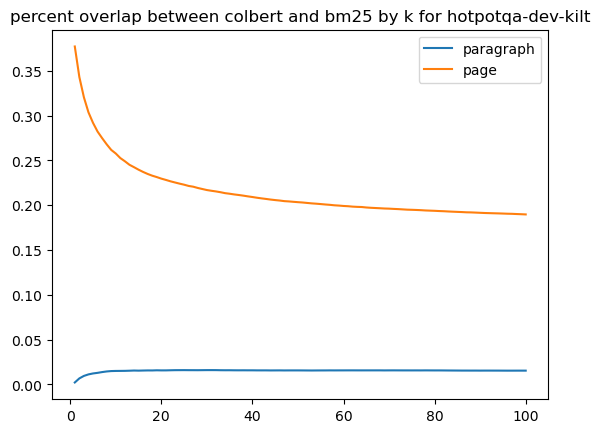

In [2]:
dataset = 'hotpotqa-dev-kilt'
retriever_overlap(dataset)

loading from /data/tir/projects/tir6/general/afreens/dbqa/retriever_results/evaluations/colbert/complete_bioasq.jsonl
loading from /data/tir/projects/tir6/general/afreens/dbqa/retriever_results/evaluations/bm25/complete_bioasq.jsonl


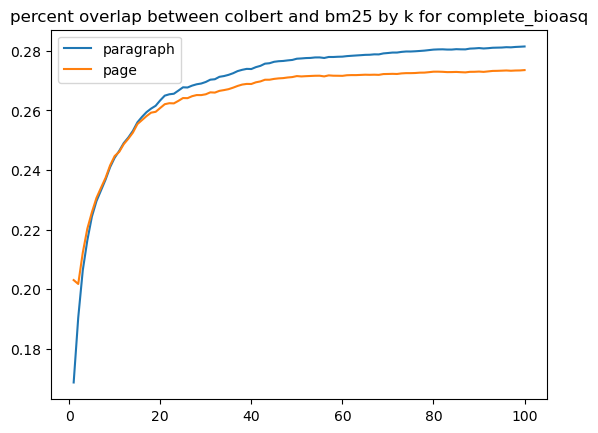

In [14]:
dataset = 'complete_bioasq'
retriever_overlap(dataset)

loading from /data/tir/projects/tir6/general/afreens/dbqa/retriever_results/evaluations/colbert/nq-dev-kilt.jsonl
loading from /data/tir/projects/tir6/general/afreens/dbqa/retriever_results/evaluations/bm25/nq-dev-kilt.jsonl


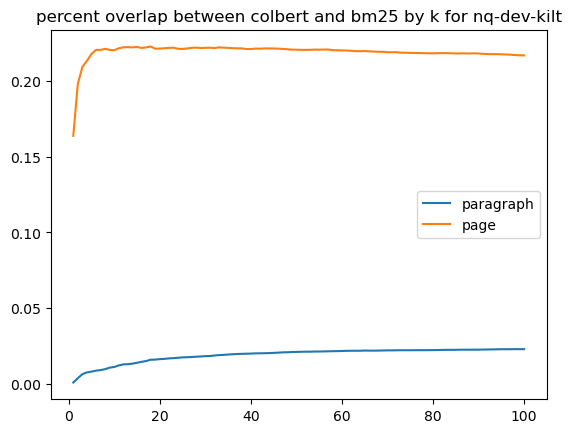

In [15]:
dataset = 'nq-dev-kilt'
retriever_overlap(dataset)

# Retriever evaluation

In [24]:
import matplotlib.pyplot as plt
import numpy as np
def retriever_stats(dataset):
# Define a color map for each type of plot (recall, precision, etc.)

    colors = plt.get_cmap('tab10')
    color_map = {
        'recall': colors(0),        # First color from tab10
        'precision': colors(1),     # Second color from tab10
        'answer_in_context': colors(2),  # Third color from tab10
        'any_page_match': colors(3),     # Fourth color from tab10
        'any_par_match': colors(4),       # Fifth color from tab10
        'all_par_match': colors(5)        # Sixth color from tab10
    }

    for retriever in ['colbert', 'bm25']:
        colbert_results = load_jsonl(f'/data/tir/projects/tir6/general/afreens/dbqa/retriever_results/evaluations/{retriever}/{dataset}.jsonl')
        overall_colbert = load_json(f'/data/tir/projects/tir6/general/afreens/dbqa/retriever_results/evaluations/{retriever}/{dataset}_results_by_k.json')
        
        recalls = []
        precisions = []
        
        for k, v in overall_colbert.items():
            recalls.append(v['recall@k page_par_id'])
            precisions.append(v['precision@k page_par_id'])
        
        answer_in_context = []
        for k in range(1, 101):
            colbert_top_k_aic = [np.any([p['answer_in_context'] for p in r['passage-level results'][:k]]) for r in colbert_results]
            answer_in_context.append(np.mean(colbert_top_k_aic))
        
        any_page_match = []
        any_page_par_match = []
        all_page_par_match = []
        for k in range(1, 101):
            colbert_top_k_apm = [np.any([p['page_id_match'] for p in r['passage-level results'][:k]]) for r in colbert_results]
            colbert_top_k_appm = [np.any([p['page_par_id_match'] for p in r['passage-level results'][:k]]) for r in colbert_results]
            if 'hotpotqa' in dataset:
                colbert_top_k_allppm = [np.sum([p['page_par_id_match'] for p in r['passage-level results'][:k]])==2 for r in colbert_results]
                all_page_par_match.append(np.mean(colbert_top_k_allppm))

            any_page_match.append(np.mean(colbert_top_k_apm))
            any_page_par_match.append(np.mean(colbert_top_k_appm))
        
        linestyle = '-' if retriever == 'colbert' else '--'
        
        # Plot each metric with the same color but different linestyle
        plt.plot(overall_colbert.keys(), recalls, color=color_map['recall'], linestyle=linestyle, label=f'{retriever} recall')
        plt.plot(overall_colbert.keys(), precisions, color=color_map['precision'], linestyle=linestyle, label=f'{retriever} precision')
        plt.plot(overall_colbert.keys(), answer_in_context, color=color_map['answer_in_context'], linestyle=linestyle, label=f'{retriever} answer_in_context')
        plt.plot(overall_colbert.keys(), any_page_match, color=color_map['any_page_match'], linestyle=linestyle, label=f'{retriever} any page match')
        plt.plot(overall_colbert.keys(), any_page_par_match, color=color_map['any_par_match'], linestyle=linestyle, label=f'{retriever} any par match')
        if 'hotpotqa' in dataset:
            plt.plot(overall_colbert.keys(), all_page_par_match, color=color_map['all_par_match'], linestyle=linestyle, label=f'{retriever} all par match')

    # Set xticks and add labels
    plt.xticks(range(0, 100, 10))
    plt.legend()
    plt.title(f'Retriever stats vs. k for {dataset}')
    plt.show()

loading from /data/tir/projects/tir6/general/afreens/dbqa/retriever_results/evaluations/colbert/complete_bioasq.jsonl
loading from /data/tir/projects/tir6/general/afreens/dbqa/retriever_results/evaluations/colbert/complete_bioasq_results_by_k.json
loading from /data/tir/projects/tir6/general/afreens/dbqa/retriever_results/evaluations/bm25/complete_bioasq.jsonl
loading from /data/tir/projects/tir6/general/afreens/dbqa/retriever_results/evaluations/bm25/complete_bioasq_results_by_k.json


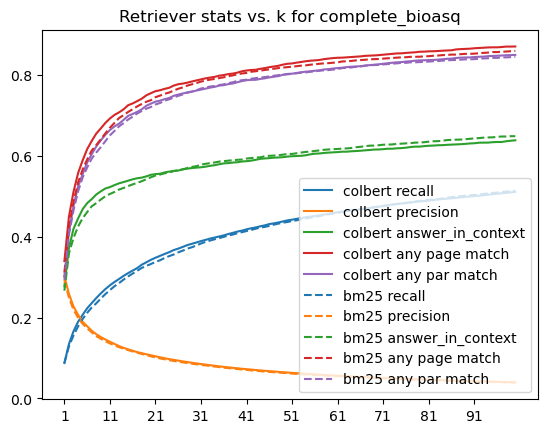

In [18]:
dataset = 'complete_bioasq'
retriever_stats(dataset)

loading from /data/tir/projects/tir6/general/afreens/dbqa/retriever_results/evaluations/colbert/nq-dev-kilt.jsonl
loading from /data/tir/projects/tir6/general/afreens/dbqa/retriever_results/evaluations/colbert/nq-dev-kilt_results_by_k.json
loading from /data/tir/projects/tir6/general/afreens/dbqa/retriever_results/evaluations/bm25/nq-dev-kilt.jsonl
loading from /data/tir/projects/tir6/general/afreens/dbqa/retriever_results/evaluations/bm25/nq-dev-kilt_results_by_k.json


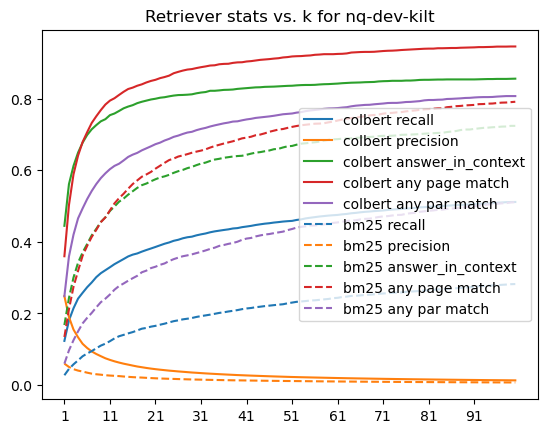

In [19]:
dataset = 'nq-dev-kilt'
retriever_stats(dataset)

loading from /data/tir/projects/tir6/general/afreens/dbqa/retriever_results/evaluations/colbert/hotpotqa-dev-kilt.jsonl
loading from /data/tir/projects/tir6/general/afreens/dbqa/retriever_results/evaluations/colbert/hotpotqa-dev-kilt_results_by_k.json
loading from /data/tir/projects/tir6/general/afreens/dbqa/retriever_results/evaluations/bm25/hotpotqa-dev-kilt.jsonl
loading from /data/tir/projects/tir6/general/afreens/dbqa/retriever_results/evaluations/bm25/hotpotqa-dev-kilt_results_by_k.json


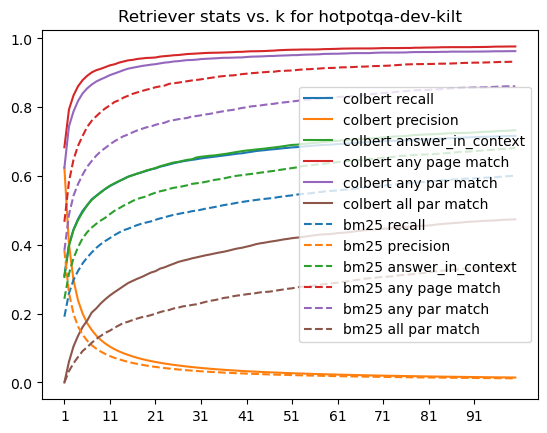

In [25]:
dataset = 'hotpotqa-dev-kilt'
retriever_stats(dataset)

# Average reader performance for each unique retriever evaluation value

In [30]:
import numpy as np
import pandas as pd
def bar_plot_reader_by_retriever(retriever, reader_models, dataset, condition, retrieval_unit = 'page_par'):
    
    gold_retriever = load_json(f'/data/tir/projects/tir6/general/afreens/dbqa/data/gold_compilation_files/gold_{dataset}_compilation_file.json', sort_by_id = True)
    retriever_results = load_jsonl(f'/data/tir/projects/tir6/general/afreens/dbqa/retriever_results/evaluations/{retriever}/{dataset}.jsonl')
    for reader in reader_models:
        no_context = load_jsonl(f'/data/tir/projects/tir6/general/afreens/dbqa/reader_results/{reader}/{dataset}/no_context/all_data_evaluated.jsonl', do_print = False)
        no_context_scores = [s['answer_evaluation']['f1'] for s in no_context]
        
        for ki, k in enumerate([1, 2, 5, 10, 20, 50]):
            condition_value_compiled = []
            f1_compiled = []
        
            # Load the data for the current reader
            filepath = f'/data/tir/projects/tir6/general/afreens/dbqa/reader_results/{reader}/{dataset}/{retriever}/top_k/top{k}/all_data_evaluated.jsonl'
            reader_top_k = load_jsonl(filepath, do_print = False)
            
            # Extract the F1 scores from the loaded data
            reader_top_k_scores = [s['answer_evaluation']['f1'] for s in reader_top_k]
            if condition == 'precision':
            # top_k_condition_value = [np.sum([p[f'{retrieval_unit}_id_match'] for p in r['passage-level results'][:k]]) / np.sum([1 - p[f'{retrieval_unit}_id_match'] for p in r['passage-level results'][:k]]) if np.sum([1 - p[f'{retrieval_unit}_id_match'] for p in r['passage-level results'][:k]]) > 0 else float('inf') for r in retriever_results]
                top_k_condition_reuslts = [np.mean([p[f'{retrieval_unit}_id_match'] for p in r['passage-level results'][:k]])for r in retriever_results]
            # top_k_condition_value = [np.sum([p[f'{retrieval_unit}_id_match'] for p in r['passage-level results'][:k]]) / np.sum([1 - p[f'{retrieval_unit}_id_match'] for p in r['passage-level results'][:k]]) if np.sum([1 - p[f'{retrieval_unit}_id_match'] for p in r['passage-level results'][:k]]) > 0 else float('inf') for r in retriever_results]
            elif condition == 'recall':
                top_k_condition_reuslts = [np.sum([p[f'{retrieval_unit}_id_match'] for p in r['passage-level results'][:k]])/len(s['output'][f'{retrieval_unit}_id_set']) for r,s in zip(retriever_results, gold_retriever)]
            elif condition == 'any_match':
                top_k_condition_reuslts = [np.any([p[f'{retrieval_unit}_id_match'] for p in r['passage-level results'][:k]]) for r in retriever_results]
            elif condition == 'answer_in_context':
                top_k_condition_reuslts = [np.any([p['answer_in_context'] for p in r['passage-level results'][:k]]) for r in retriever_results]
            
            condition_value_compiled.extend(top_k_condition_reuslts)
            f1_compiled.extend(reader_top_k_scores)
        
            # Create a DataFrame with condition_value and F1 scores (assuming top_k_condition_value is already defined)
            df = pd.DataFrame({
                'condition_value': condition_value_compiled,  # Assuming top_k_condition_value is already available
                'F1': f1_compiled
            })
            
            average_f1_by_condition_value = df.groupby('condition_value').agg(
                mean_F1=('F1', 'mean'),   # Mean F1 score
                std_F1=('F1', 'std')      # Standard deviation of F1 score
            ).reset_index()

            condition_value_unique = average_f1_by_condition_value['condition_value']
            index  = np.arange(len(condition_value_unique))
            f1_avg = average_f1_by_condition_value['mean_F1']
            f1_std = average_f1_by_condition_value['std_F1']
            print(index+ki*0.05)
            print(f1_std)
            plt.bar(index + ki*0.05, f1_avg, 0.05, yerr = f1_std, label = f'{reader} at k = {k}')
            plt.xticks(index + 0.05, condition_value_unique)
            # plt.fill_between(condition_value_unique, f1_avg - f1_std, f1_avg + f1_std, alpha=0.2)  # Shaded area for std

            # for s, f in zip(condition_value_unique, f1_avg):
            print(f'{reader} at k = {k} F1 slope: {f1_avg[1] - f1_avg[0]} F1 intercept: {f1_avg[0]}')  
        plt.hlines(np.mean(no_context_scores), 0, 1, label = f'{reader} no context', linestyle='--')
        plt.xlabel(condition)
        plt.ylabel('Average F1 Score')
        # plt.ylim(bottom = 0,top = 1.0)
        plt.title(f'Average F1 Score; condition {retrieval_unit} {condition}; retriever {retriever}; dataset {dataset}')
        plt.grid(True)
        plt.legend()
        plt.show()

# Proportion of instances for each unique retriever evaluation value

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np



def proportion_by_condition(retriever, dataset, condition, retrieval_unit = 'page_par'):

    retriever_results = load_jsonl(f'/data/tir/projects/tir6/general/afreens/dbqa/retriever_results/evaluations/{retriever}/{dataset}.jsonl')
    gold_retriever = load_json(f'/data/tir/projects/tir6/general/afreens/dbqa/data/gold_compilation_files/gold_{dataset}_compilation_file.json', sort_by_id = True)
    # reader_models = ['flanT5', 'flanUl2',  'llama2_7b', 'llama2_70b','gpt-3.5_16000truncation_10new_tokens', 'claude_haiku_200000truncation_10new_tokens']
    # plt.figure(figsize=(8, 6))
    # for reader in reader_models:
    for k in [1,2, 5, 10, 20, 50]:
        condition_value_compiled = []

        if condition == 'precision':
        # top_k_condition_value = [np.sum([p[f'{retrieval_unit}_id_match'] for p in r['passage-level results'][:k]]) / np.sum([1 - p[f'{retrieval_unit}_id_match'] for p in r['passage-level results'][:k]]) if np.sum([1 - p[f'{retrieval_unit}_id_match'] for p in r['passage-level results'][:k]]) > 0 else float('inf') for r in retriever_results]
            top_k_condition_reuslts = [np.mean([p[f'{retrieval_unit}_id_match'] for p in r['passage-level results'][:k]])for r in retriever_results]
        # top_k_condition_value = [np.sum([p[f'{retrieval_unit}_id_match'] for p in r['passage-level results'][:k]]) / np.sum([1 - p[f'{retrieval_unit}_id_match'] for p in r['passage-level results'][:k]]) if np.sum([1 - p[f'{retrieval_unit}_id_match'] for p in r['passage-level results'][:k]]) > 0 else float('inf') for r in retriever_results]
        elif condition == 'recall':
            top_k_condition_reuslts = [np.sum([p[f'{retrieval_unit}_id_match'] for p in r['passage-level results'][:k]])/len(s['output'][f'{retrieval_unit}_id_set']) for r,s in zip(retriever_results, gold_retriever)]
        elif condition == 'any_match':
            top_k_condition_reuslts = [np.any([p[f'{retrieval_unit}_id_match'] for p in r['passage-level results'][:k]]) for r in retriever_results]
        elif condition == 'answer_in_context':
            top_k_condition_reuslts = [np.any([p['answer_in_context'] for p in r['passage-level results'][:k]]) for r in retriever_results]
        
        condition_value_compiled.extend(top_k_condition_reuslts)

        df = pd.DataFrame({
            'condition_value': condition_value_compiled,  # Assuming top_k_condition_value is already available
        })

        # average_f1_by_snr = df.groupby('SNR').agg({'F1': 'mean', 'SNR_count': 'size'}).reset_index()
        average_f1_by_condition_value = df.groupby('condition_value').agg(
            # average_F1=('F1', 'mean'),  # Compute the mean F1 score for each SNR
            condition_value_size=('condition_value', 'size')    # Count the number of instances for each SNR
            ).reset_index()
        
        # Extract unique SNR and their counts
        # condition_value_unique = average_f1_by_condition_value['average_F1']
        condition_value_counts = average_f1_by_condition_value['condition_value_size']

        # Step 4: Plot the proportion of instances for each unique precision value
        plt.plot(average_f1_by_condition_value['condition_value'].unique(), condition_value_counts / len(df), marker='o', linestyle='-', label=f'k = {k}')

    plt.xlabel(condition)
    plt.ylabel('Proportion of Instances')
    plt.title(f'Proportion of Instances at Each {retrieval_unit} {condition} Value; dataset {dataset}')
    plt.grid(True)
    plt.legend()
    plt.show()



loading from /data/tir/projects/tir6/general/afreens/dbqa/retriever_results/evaluations/colbert/nq-dev-kilt.jsonl
loading from /data/tir/projects/tir6/general/afreens/dbqa/data/gold_compilation_files/gold_nq-dev-kilt_compilation_file.json


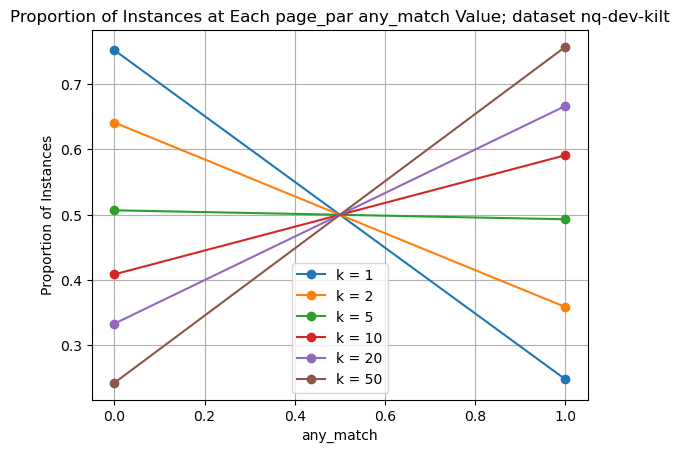

In [15]:
proportion_by_condition('colbert', 'nq-dev-kilt', 'any_match', retrieval_unit = 'page_par')

In [35]:

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from file_utils import load_json, load_jsonl


def line_plot_reader_by_retriever(retriever, reader_models, dataset, condition, retrieval_unit = 'page_par'):
    
    gold_retriever = load_json(f'/data/tir/projects/tir6/general/afreens/dbqa/data/gold_compilation_files/gold_{dataset}_compilation_file.json', sort_by_id = True)
    retriever_results = load_jsonl(f'/data/tir/projects/tir6/general/afreens/dbqa/retriever_results/evaluations/{retriever}/{dataset}.jsonl')
    for reader in reader_models:
        no_context = load_jsonl(f'/data/tir/projects/tir6/general/afreens/dbqa/reader_results/{reader}/{dataset}/no_context/all_data_evaluated.jsonl', do_print = False)
        no_context_scores = [s['answer_evaluation']['f1'] for s in no_context]
        
        for k in [1, 2, 5, 10, 20, 50]:
            condition_value_compiled = []
            f1_compiled = []
        
            # Load the data for the current reader
            filepath = f'/data/tir/projects/tir6/general/afreens/dbqa/reader_results/{reader}/{dataset}/{retriever}/top_k/top{k}/all_data_evaluated.jsonl'
            reader_top_k = load_jsonl(filepath, do_print = False)
            
            # Extract the F1 scores from the loaded data
            reader_top_k_scores = [s['answer_evaluation']['f1'] for s in reader_top_k]
            if condition == 'precision':
            # top_k_condition_value = [np.sum([p[f'{retrieval_unit}_id_match'] for p in r['passage-level results'][:k]]) / np.sum([1 - p[f'{retrieval_unit}_id_match'] for p in r['passage-level results'][:k]]) if np.sum([1 - p[f'{retrieval_unit}_id_match'] for p in r['passage-level results'][:k]]) > 0 else float('inf') for r in retriever_results]
                top_k_condition_reuslts = [np.mean([p[f'{retrieval_unit}_id_match'] for p in r['passage-level results'][:k]])for r in retriever_results]
            # top_k_condition_value = [np.sum([p[f'{retrieval_unit}_id_match'] for p in r['passage-level results'][:k]]) / np.sum([1 - p[f'{retrieval_unit}_id_match'] for p in r['passage-level results'][:k]]) if np.sum([1 - p[f'{retrieval_unit}_id_match'] for p in r['passage-level results'][:k]]) > 0 else float('inf') for r in retriever_results]
            elif condition == 'recall':
                top_k_condition_reuslts = [np.sum([p[f'{retrieval_unit}_id_match'] for p in r['passage-level results'][:k]])/len(s['output'][f'{retrieval_unit}_id_set']) for r,s in zip(retriever_results, gold_retriever)]
            elif condition == 'any_match':
                top_k_condition_reuslts = [np.any([p[f'{retrieval_unit}_id_match'] for p in r['passage-level results'][:k]]) for r in retriever_results]
            elif condition == 'answer_in_context':
                top_k_condition_reuslts = [np.any([p['answer_in_context'] for p in r['passage-level results'][:k]]) for r in retriever_results]
            
            condition_value_compiled.extend(top_k_condition_reuslts)
            f1_compiled.extend(reader_top_k_scores)
        
            # Create a DataFrame with condition_value and F1 scores (assuming top_k_condition_value is already defined)
            df = pd.DataFrame({
                'condition_value': condition_value_compiled,  # Assuming top_k_condition_value is already available
                'F1': f1_compiled
            })
            
            average_f1_by_condition_value = df.groupby('condition_value').agg(
                mean_F1=('F1', 'mean'),   # Mean F1 score
                std_F1=('F1', 'std')      # Standard deviation of F1 score
            ).reset_index()


            condition_value_unique = average_f1_by_condition_value['condition_value']
            f1_avg = average_f1_by_condition_value['mean_F1']
            f1_std = average_f1_by_condition_value['std_F1']
            plt.plot(condition_value_unique, f1_avg, marker='o', linestyle='-', label = f'{reader} at k = {k}')
            # plt.fill_between(condition_value_unique, f1_avg - f1_std, f1_avg + f1_std, alpha=0.2)  # Shaded area for std

            # for s, f in zip(condition_value_unique, f1_avg):
            print(f'{reader} at k = {k} F1 slope: {f1_avg[1] - f1_avg[0]} F1 intercept: {f1_avg[0]}')  
        plt.hlines(np.mean(no_context_scores), 0, 1, label = f'{reader} no context', linestyle='--')
        plt.xlabel(condition)
        plt.ylabel('Average F1 Score')
        plt.ylim(bottom = 0,top = 1.0)
        plt.title(f'Average F1 Score; condition {retrieval_unit} {condition}; retriever {retriever}; dataset {dataset}')
        plt.grid(True)
        plt.legend()
        plt.show()

loading from /data/tir/projects/tir6/general/afreens/dbqa/data/gold_compilation_files/gold_nq-dev-kilt_compilation_file.json
loading from /data/tir/projects/tir6/general/afreens/dbqa/retriever_results/evaluations/colbert/nq-dev-kilt.jsonl
flanT5 at k = 1 F1 slope: 0.4559316796381298 F1 intercept: 0.3458749894663911
flanT5 at k = 2 F1 slope: 0.3681366254829912 F1 intercept: 0.36990341167818463
flanT5 at k = 5 F1 slope: 0.3157790501058726 F1 intercept: 0.38655208661849505
flanT5 at k = 10 F1 slope: 0.28825724707493744 F1 intercept: 0.3832634225469039
flanT5 at k = 20 F1 slope: 0.27280371711945695 F1 intercept: 0.38421642653196075
flanT5 at k = 50 F1 slope: 0.2740136604866499 F1 intercept: 0.3545025361767443


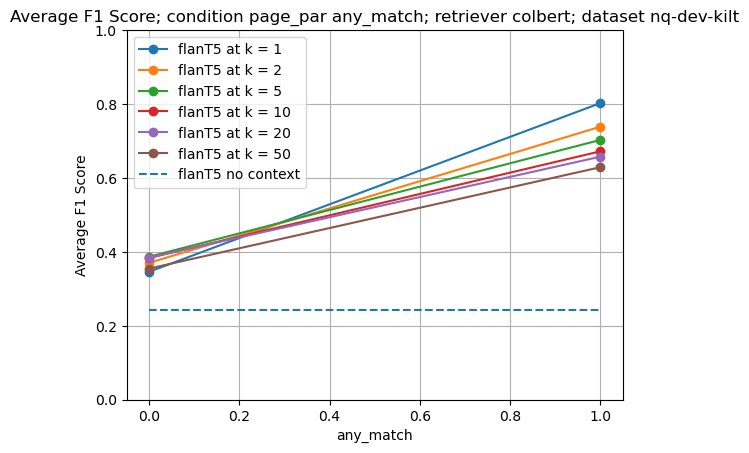

flanUl2 at k = 1 F1 slope: 0.4499673302112548 F1 intercept: 0.35300378298104296
flanUl2 at k = 2 F1 slope: 0.381497551890408 F1 intercept: 0.3690226157769648
flanUl2 at k = 5 F1 slope: 0.3255227041084879 F1 intercept: 0.3846102435379866
flanUl2 at k = 10 F1 slope: 0.3002834280661382 F1 intercept: 0.38388156068632745
flanUl2 at k = 20 F1 slope: 0.2839862948285462 F1 intercept: 0.37207365087787136
flanUl2 at k = 50 F1 slope: 0.28243944887227573 F1 intercept: 0.34594804805164864


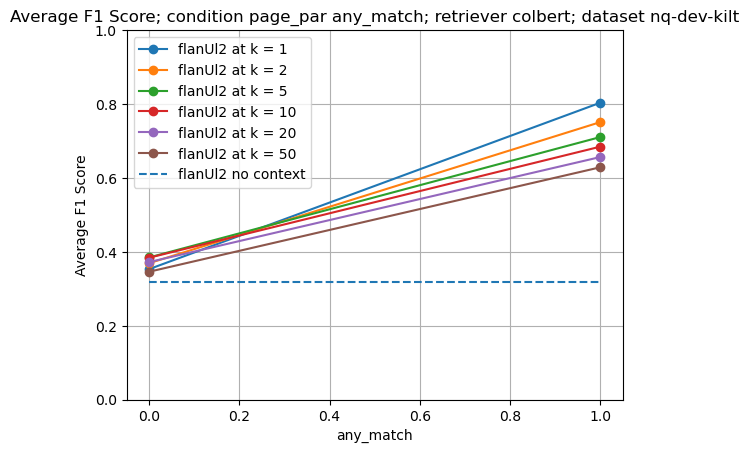

llama2_7b at k = 1 F1 slope: 0.2785015787120329 F1 intercept: 0.3531432775767767
llama2_7b at k = 2 F1 slope: 0.2256655996457841 F1 intercept: 0.33571877715327253
llama2_7b at k = 5 F1 slope: 0.17790404825447537 F1 intercept: 0.2852795946195185
llama2_7b at k = 10 F1 slope: 0.15653526516595573 F1 intercept: 0.22723955276223845
llama2_7b at k = 20 F1 slope: 0.12174698655791688 F1 intercept: 0.19112659440428598
llama2_7b at k = 50 F1 slope: 0.11548463040879564 F1 intercept: 0.14723293072342936


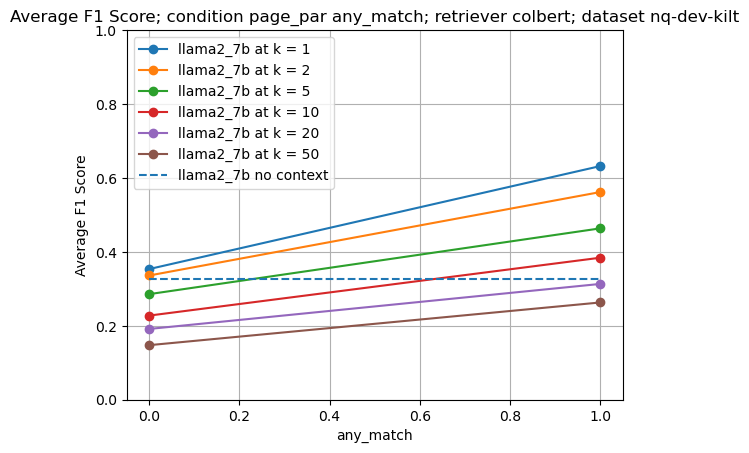

llama2_70b at k = 1 F1 slope: 0.3099389346558476 F1 intercept: 0.41088917038344336
llama2_70b at k = 2 F1 slope: 0.2452460719871417 F1 intercept: 0.4063461933691361
llama2_70b at k = 5 F1 slope: 0.22178415166947224 F1 intercept: 0.40522937117268537
llama2_70b at k = 10 F1 slope: 0.18620745721776621 F1 intercept: 0.39730834409648297
llama2_70b at k = 20 F1 slope: 0.1541678608184756 F1 intercept: 0.3550886758768281
llama2_70b at k = 50 F1 slope: 0.1276558150669126 F1 intercept: 0.26327164813410414


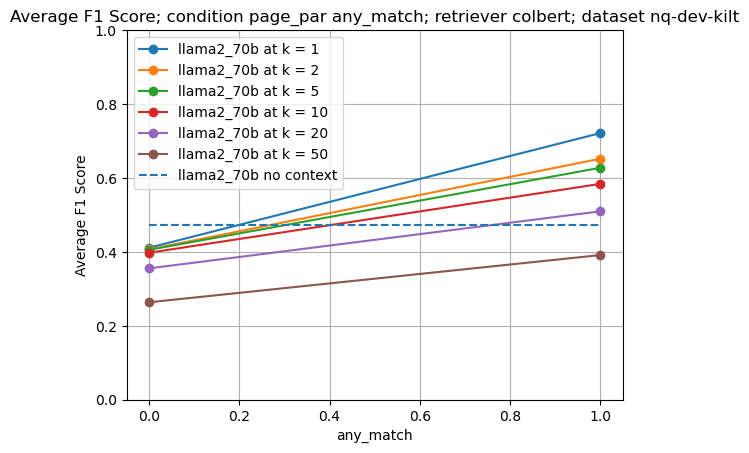

gpt-3.5_16000truncation_10new_tokens at k = 1 F1 slope: 0.36056140109470974 F1 intercept: 0.40437596657327285
gpt-3.5_16000truncation_10new_tokens at k = 2 F1 slope: 0.3191367126844202 F1 intercept: 0.3921284007614822
gpt-3.5_16000truncation_10new_tokens at k = 5 F1 slope: 0.28457477205814463 F1 intercept: 0.38811921405031913
gpt-3.5_16000truncation_10new_tokens at k = 10 F1 slope: 0.264342544836553 F1 intercept: 0.38761002485637935
gpt-3.5_16000truncation_10new_tokens at k = 20 F1 slope: 0.2571638263036377 F1 intercept: 0.38796671636074204
gpt-3.5_16000truncation_10new_tokens at k = 50 F1 slope: 0.2312668985601276 F1 intercept: 0.38340857037280407


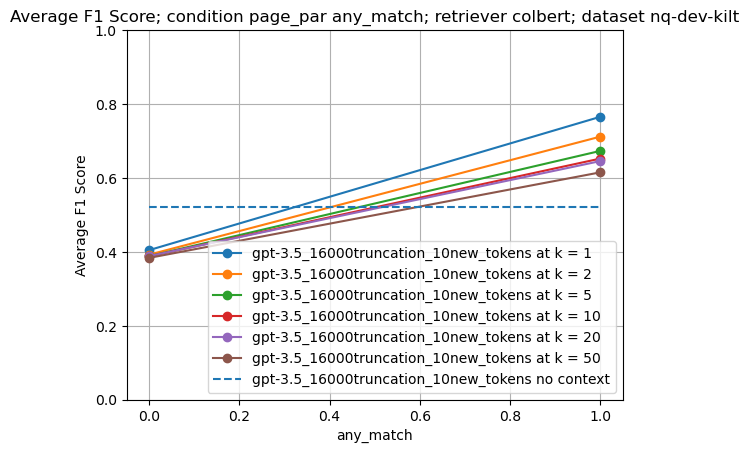

claude_haiku_200000truncation_10new_tokens at k = 1 F1 slope: 0.32659315522472515 F1 intercept: 0.3239265082881578
claude_haiku_200000truncation_10new_tokens at k = 2 F1 slope: 0.2431988518210237 F1 intercept: 0.3027545869962274
claude_haiku_200000truncation_10new_tokens at k = 5 F1 slope: 0.15929525311900392 F1 intercept: 0.21303000492711846
claude_haiku_200000truncation_10new_tokens at k = 10 F1 slope: 0.10731101921111344 F1 intercept: 0.17761980419909854
claude_haiku_200000truncation_10new_tokens at k = 20 F1 slope: 0.07654165297111012 F1 intercept: 0.13143351367388958
claude_haiku_200000truncation_10new_tokens at k = 50 F1 slope: 0.03714100754958009 F1 intercept: 0.09217803690645383


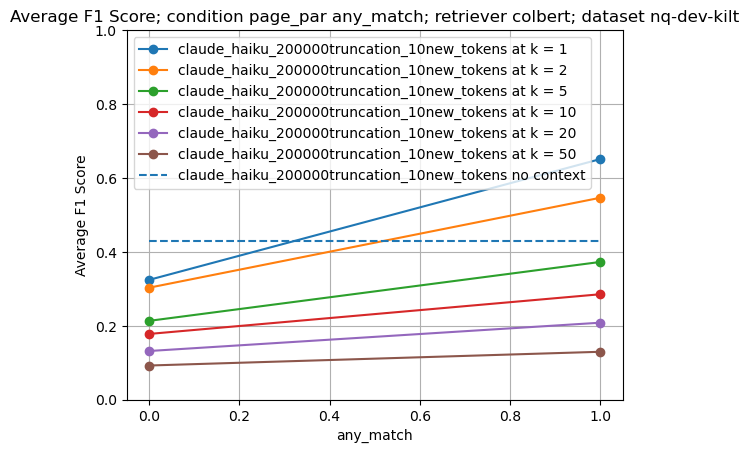

In [36]:
retriever = 'colbert'
reader_models = ['flanT5', 'flanUl2',  'llama2_7b', 'llama2_70b','gpt-3.5_16000truncation_10new_tokens', 'claude_haiku_200000truncation_10new_tokens']
dataset = 'nq-dev-kilt'
condition = 'any_match'
retrieval_unit = 'page_par'
line_plot_reader_by_retriever(retriever, reader_models, dataset, condition, retrieval_unit)

loading from /data/tir/projects/tir6/general/afreens/dbqa/data/gold_compilation_files/gold_nq-dev-kilt_compilation_file.json
loading from /data/tir/projects/tir6/general/afreens/dbqa/retriever_results/evaluations/colbert/nq-dev-kilt.jsonl
[0. 1.]
0    0.424024
1    0.328349
Name: std_F1, dtype: float64
flanT5 at k = 1 F1 slope: 0.4559316796381298 F1 intercept: 0.3458749894663911
[0.05 1.05]
0    0.430972
1    0.375152
Name: std_F1, dtype: float64
flanT5 at k = 2 F1 slope: 0.3681366254829912 F1 intercept: 0.36990341167818463
[0.1 1.1]
0    0.439247
1    0.396653
Name: std_F1, dtype: float64
flanT5 at k = 5 F1 slope: 0.3157790501058726 F1 intercept: 0.38655208661849505
[0.15 1.15]
0    0.438359
1    0.410230
Name: std_F1, dtype: float64
flanT5 at k = 10 F1 slope: 0.28825724707493744 F1 intercept: 0.3832634225469039
[0.2 1.2]
0    0.442780
1    0.419203
Name: std_F1, dtype: float64
flanT5 at k = 20 F1 slope: 0.27280371711945695 F1 intercept: 0.38421642653196075
[0.25 1.25]
0    0.430820
1

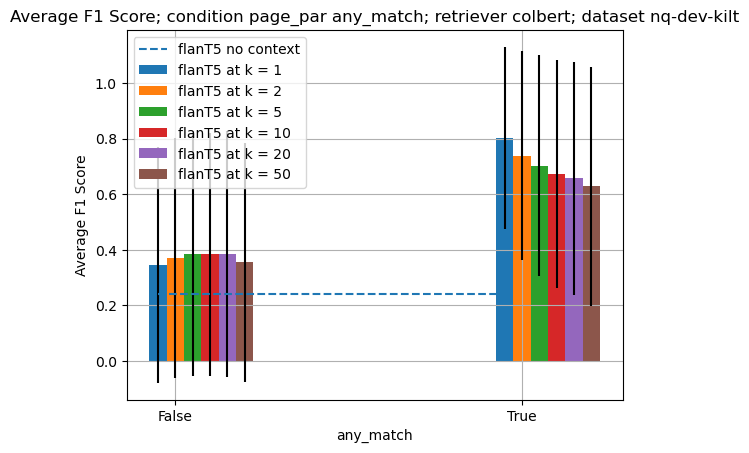

[0. 1.]
0    0.427992
1    0.331640
Name: std_F1, dtype: float64
flanUl2 at k = 1 F1 slope: 0.4499673302112548 F1 intercept: 0.35300378298104296
[0.05 1.05]
0    0.430607
1    0.374769
Name: std_F1, dtype: float64
flanUl2 at k = 2 F1 slope: 0.381497551890408 F1 intercept: 0.3690226157769648
[0.1 1.1]
0    0.437777
1    0.397989
Name: std_F1, dtype: float64
flanUl2 at k = 5 F1 slope: 0.3255227041084879 F1 intercept: 0.3846102435379866
[0.15 1.15]
0    0.440036
1    0.409201
Name: std_F1, dtype: float64
flanUl2 at k = 10 F1 slope: 0.3002834280661382 F1 intercept: 0.38388156068632745
[0.2 1.2]
0    0.439578
1    0.423604
Name: std_F1, dtype: float64
flanUl2 at k = 20 F1 slope: 0.2839862948285462 F1 intercept: 0.37207365087787136
[0.25 1.25]
0    0.434863
1    0.435525
Name: std_F1, dtype: float64
flanUl2 at k = 50 F1 slope: 0.28243944887227573 F1 intercept: 0.34594804805164864


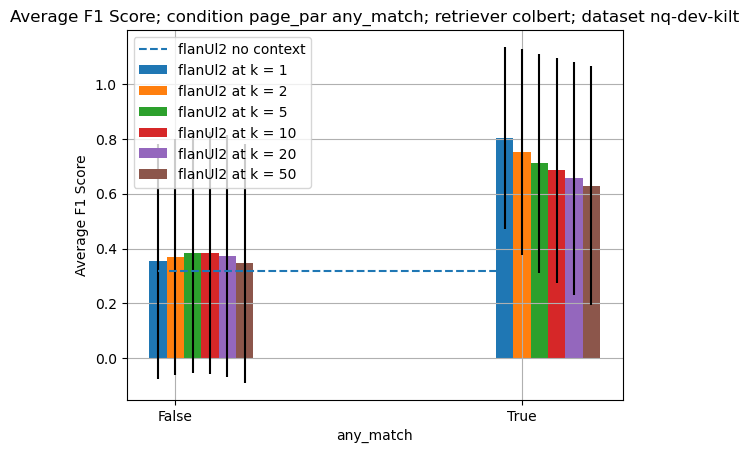

[0. 1.]
0    0.415900
1    0.413393
Name: std_F1, dtype: float64
llama2_7b at k = 1 F1 slope: 0.2785015787120329 F1 intercept: 0.3531432775767767
[0.05 1.05]
0    0.414176
1    0.424948
Name: std_F1, dtype: float64
llama2_7b at k = 2 F1 slope: 0.2256655996457841 F1 intercept: 0.33571877715327253
[0.1 1.1]
0    0.387070
1    0.425617
Name: std_F1, dtype: float64
llama2_7b at k = 5 F1 slope: 0.17790404825447537 F1 intercept: 0.2852795946195185
[0.15 1.15]
0    0.344374
1    0.409891
Name: std_F1, dtype: float64
llama2_7b at k = 10 F1 slope: 0.15653526516595573 F1 intercept: 0.22723955276223845
[0.2 1.2]
0    0.304292
1    0.377471
Name: std_F1, dtype: float64
llama2_7b at k = 20 F1 slope: 0.12174698655791688 F1 intercept: 0.19112659440428598
[0.25 1.25]
0    0.267825
1    0.359147
Name: std_F1, dtype: float64
llama2_7b at k = 50 F1 slope: 0.11548463040879564 F1 intercept: 0.14723293072342936


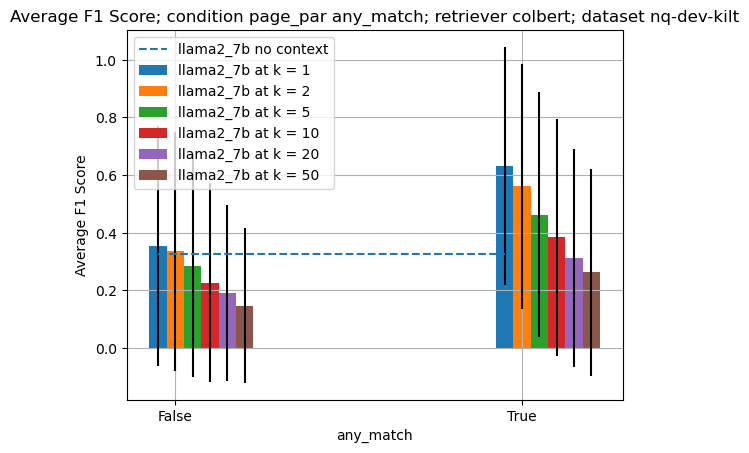

[0. 1.]
0    0.431991
1    0.383247
Name: std_F1, dtype: float64
llama2_70b at k = 1 F1 slope: 0.3099389346558476 F1 intercept: 0.41088917038344336
[0.05 1.05]
0    0.430079
1    0.402379
Name: std_F1, dtype: float64
llama2_70b at k = 2 F1 slope: 0.2452460719871417 F1 intercept: 0.4063461933691361
[0.1 1.1]
0    0.431677
1    0.408726
Name: std_F1, dtype: float64
llama2_70b at k = 5 F1 slope: 0.22178415166947224 F1 intercept: 0.40522937117268537
[0.15 1.15]
0    0.426119
1    0.423349
Name: std_F1, dtype: float64
llama2_70b at k = 10 F1 slope: 0.18620745721776621 F1 intercept: 0.39730834409648297
[0.2 1.2]
0    0.411948
1    0.429091
Name: std_F1, dtype: float64
llama2_70b at k = 20 F1 slope: 0.1541678608184756 F1 intercept: 0.3550886758768281
[0.25 1.25]
0    0.370821
1    0.413507
Name: std_F1, dtype: float64
llama2_70b at k = 50 F1 slope: 0.1276558150669126 F1 intercept: 0.26327164813410414


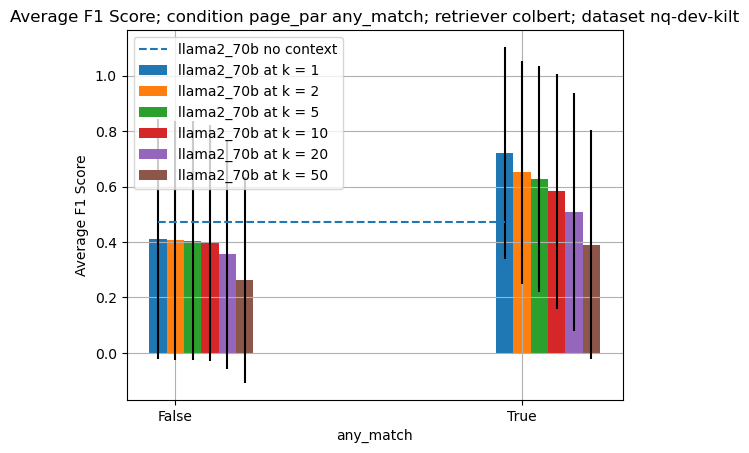

[0. 1.]
0    0.434341
1    0.352644
Name: std_F1, dtype: float64
gpt-3.5_16000truncation_10new_tokens at k = 1 F1 slope: 0.36056140109470974 F1 intercept: 0.40437596657327285
[0.05 1.05]
0    0.430421
1    0.383589
Name: std_F1, dtype: float64
gpt-3.5_16000truncation_10new_tokens at k = 2 F1 slope: 0.3191367126844202 F1 intercept: 0.3921284007614822
[0.1 1.1]
0    0.425816
1    0.395592
Name: std_F1, dtype: float64
gpt-3.5_16000truncation_10new_tokens at k = 5 F1 slope: 0.28457477205814463 F1 intercept: 0.38811921405031913
[0.15 1.15]
0    0.429325
1    0.405335
Name: std_F1, dtype: float64
gpt-3.5_16000truncation_10new_tokens at k = 10 F1 slope: 0.264342544836553 F1 intercept: 0.38761002485637935
[0.2 1.2]
0    0.426132
1    0.407840
Name: std_F1, dtype: float64
gpt-3.5_16000truncation_10new_tokens at k = 20 F1 slope: 0.2571638263036377 F1 intercept: 0.38796671636074204
[0.25 1.25]
0    0.423806
1    0.418014
Name: std_F1, dtype: float64
gpt-3.5_16000truncation_10new_tokens at k = 50 

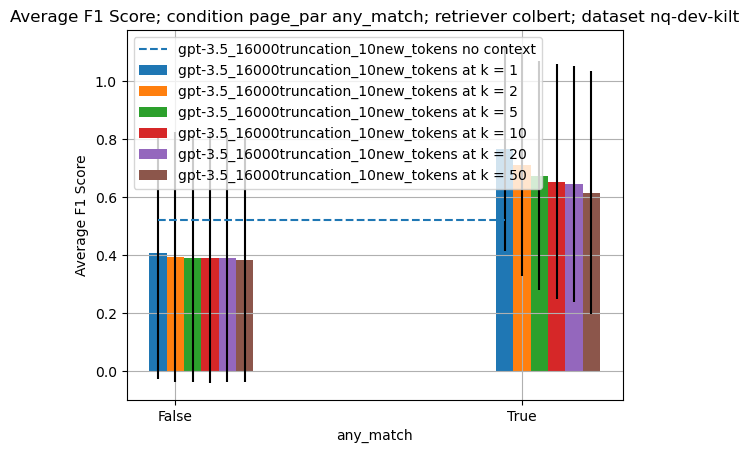

[0. 1.]
0    0.397990
1    0.381879
Name: std_F1, dtype: float64
claude_haiku_200000truncation_10new_tokens at k = 1 F1 slope: 0.32659315522472515 F1 intercept: 0.3239265082881578
[0.05 1.05]
0    0.383667
1    0.390511
Name: std_F1, dtype: float64
claude_haiku_200000truncation_10new_tokens at k = 2 F1 slope: 0.2431988518210237 F1 intercept: 0.3027545869962274
[0.1 1.1]
0    0.309904
1    0.348202
Name: std_F1, dtype: float64
claude_haiku_200000truncation_10new_tokens at k = 5 F1 slope: 0.15929525311900392 F1 intercept: 0.21303000492711846
[0.15 1.15]
0    0.278042
1    0.314592
Name: std_F1, dtype: float64
claude_haiku_200000truncation_10new_tokens at k = 10 F1 slope: 0.10731101921111344 F1 intercept: 0.17761980419909854
[0.2 1.2]
0    0.230761
1    0.278418
Name: std_F1, dtype: float64
claude_haiku_200000truncation_10new_tokens at k = 20 F1 slope: 0.07654165297111012 F1 intercept: 0.13143351367388958
[0.25 1.25]
0    0.193959
1    0.223286
Name: std_F1, dtype: float64
claude_haiku_20

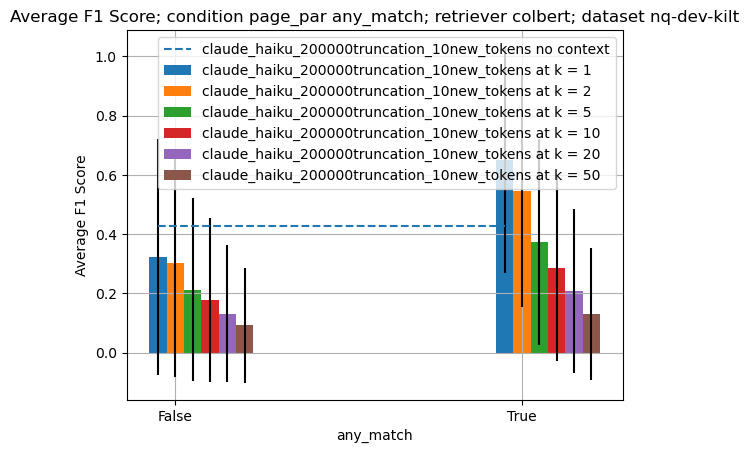

In [37]:
retriever = 'colbert'
reader_models = ['flanT5', 'flanUl2',  'llama2_7b', 'llama2_70b','gpt-3.5_16000truncation_10new_tokens', 'claude_haiku_200000truncation_10new_tokens']
dataset = 'nq-dev-kilt'
condition = 'any_match'
retrieval_unit = 'page_par'
bar_plot_reader_by_retriever(retriever, reader_models, dataset, condition, retrieval_unit)

loading from /data/tir/projects/tir6/general/afreens/dbqa/data/gold_compilation_files/gold_nq-dev-kilt_compilation_file.json
loading from /data/tir/projects/tir6/general/afreens/dbqa/retriever_results/evaluations/colbert/nq-dev-kilt.jsonl
flanT5 at k = 1 F1 slope: 0.4559316796381298 F1 intercept: 0.3458749894663911
flanT5 at k = 2 F1 slope: 0.3691773615582916 F1 intercept: 0.36990341167818463
flanT5 at k = 5 F1 slope: 0.3116900415125887 F1 intercept: 0.38655208661849505
flanT5 at k = 10 F1 slope: 0.2756628007792418 F1 intercept: 0.3832634225469039
flanT5 at k = 20 F1 slope: 0.25933403044019143 F1 intercept: 0.38421642653196075


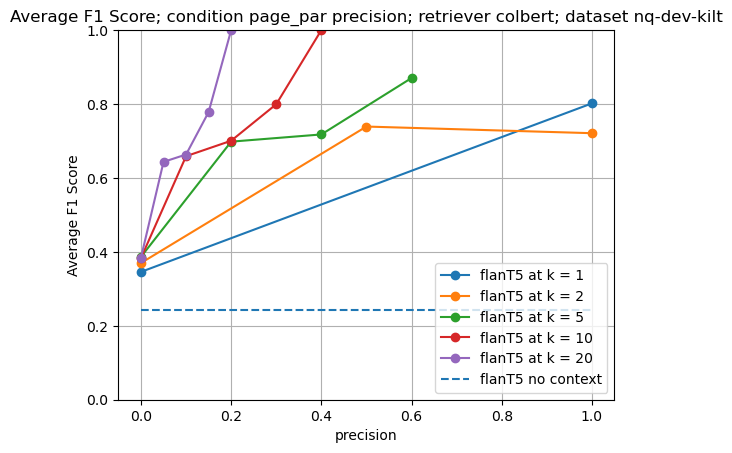

flanUl2 at k = 1 F1 slope: 0.4499673302112548 F1 intercept: 0.35300378298104296
flanUl2 at k = 2 F1 slope: 0.38051797323792547 F1 intercept: 0.3690226157769648
flanUl2 at k = 5 F1 slope: 0.3155572269726212 F1 intercept: 0.3846102435379866
flanUl2 at k = 10 F1 slope: 0.2830287041502441 F1 intercept: 0.38388156068632745
flanUl2 at k = 20 F1 slope: 0.26840749455618007 F1 intercept: 0.37207365087787136


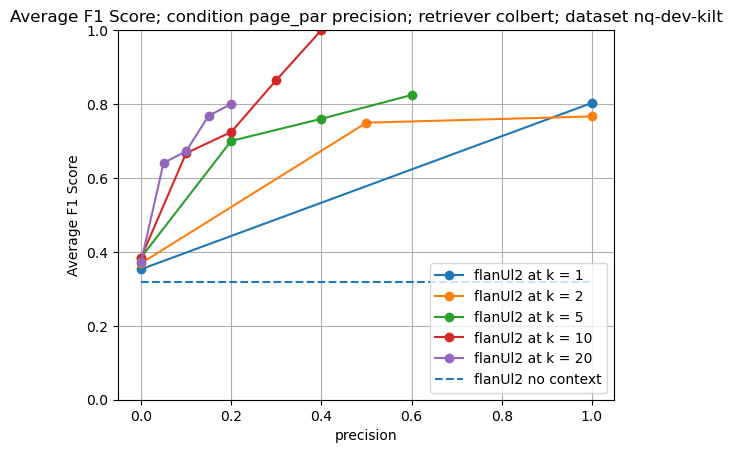

llama2_7b at k = 1 F1 slope: 0.2785015787120329 F1 intercept: 0.3531432775767767
llama2_7b at k = 2 F1 slope: 0.22512277169762712 F1 intercept: 0.33571877715327253
llama2_7b at k = 5 F1 slope: 0.17186365721976765 F1 intercept: 0.2852795946195185
llama2_7b at k = 10 F1 slope: 0.14275291849349647 F1 intercept: 0.22723955276223845
llama2_7b at k = 20 F1 slope: 0.10548359294946763 F1 intercept: 0.19112659440428598


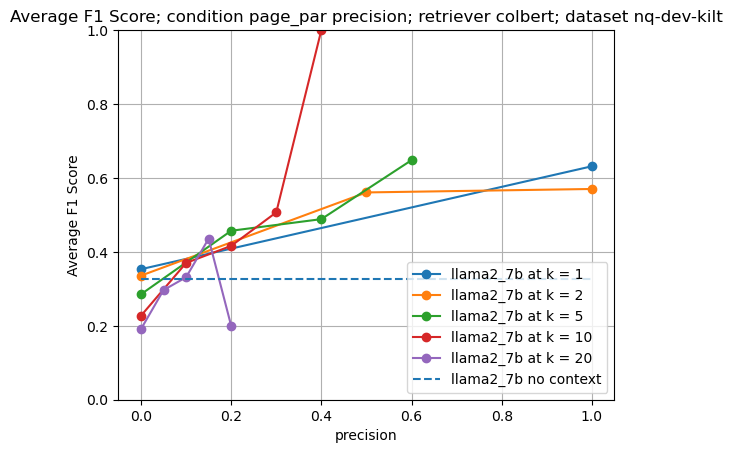

llama2_70b at k = 1 F1 slope: 0.3099389346558476 F1 intercept: 0.41088917038344336
llama2_70b at k = 2 F1 slope: 0.2421468141651522 F1 intercept: 0.4063461933691361
llama2_70b at k = 5 F1 slope: 0.2142856038000937 F1 intercept: 0.40522937117268537
llama2_70b at k = 10 F1 slope: 0.1692234778771553 F1 intercept: 0.39730834409648297
llama2_70b at k = 20 F1 slope: 0.1433998475726863 F1 intercept: 0.3550886758768281


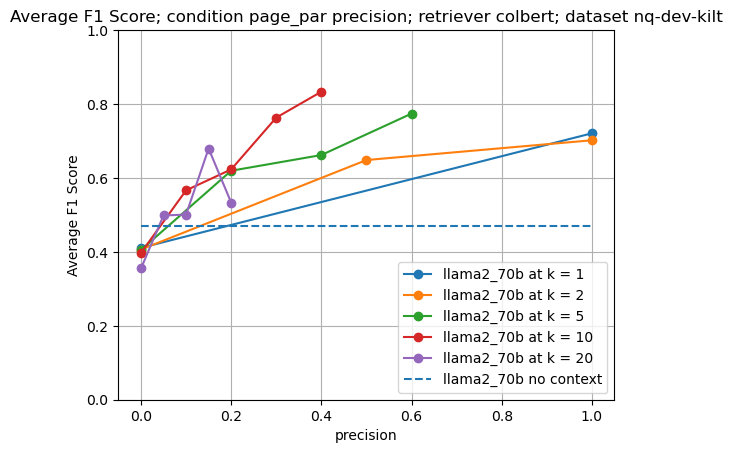

gpt-3.5_16000truncation_10new_tokens at k = 1 F1 slope: 0.36056140109470974 F1 intercept: 0.40437596657327285
gpt-3.5_16000truncation_10new_tokens at k = 2 F1 slope: 0.313838333276204 F1 intercept: 0.3921284007614822
gpt-3.5_16000truncation_10new_tokens at k = 5 F1 slope: 0.27240328845830386 F1 intercept: 0.38811921405031913
gpt-3.5_16000truncation_10new_tokens at k = 10 F1 slope: 0.2544768735033503 F1 intercept: 0.38761002485637935
gpt-3.5_16000truncation_10new_tokens at k = 20 F1 slope: 0.2525245090086314 F1 intercept: 0.38796671636074204


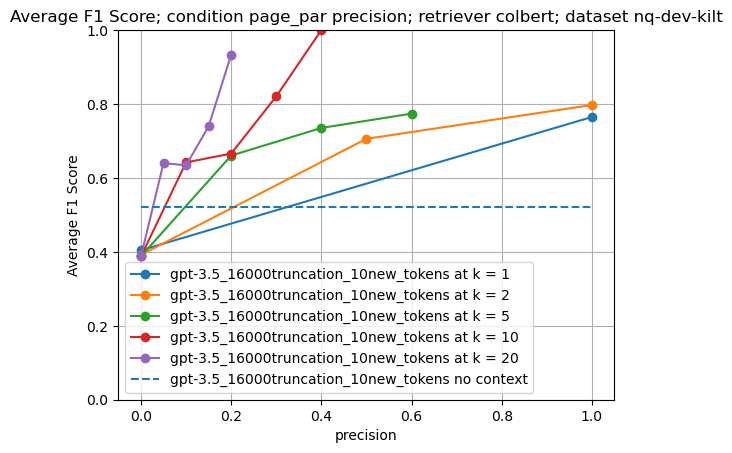

claude_haiku_200000truncation_10new_tokens at k = 1 F1 slope: 0.32659315522472515 F1 intercept: 0.3239265082881578
claude_haiku_200000truncation_10new_tokens at k = 2 F1 slope: 0.24238746339192635 F1 intercept: 0.3027545869962274
claude_haiku_200000truncation_10new_tokens at k = 5 F1 slope: 0.15157844797511785 F1 intercept: 0.21303000492711846
claude_haiku_200000truncation_10new_tokens at k = 10 F1 slope: 0.09872638024870986 F1 intercept: 0.17761980419909854
claude_haiku_200000truncation_10new_tokens at k = 20 F1 slope: 0.07392995374499656 F1 intercept: 0.13143351367388958


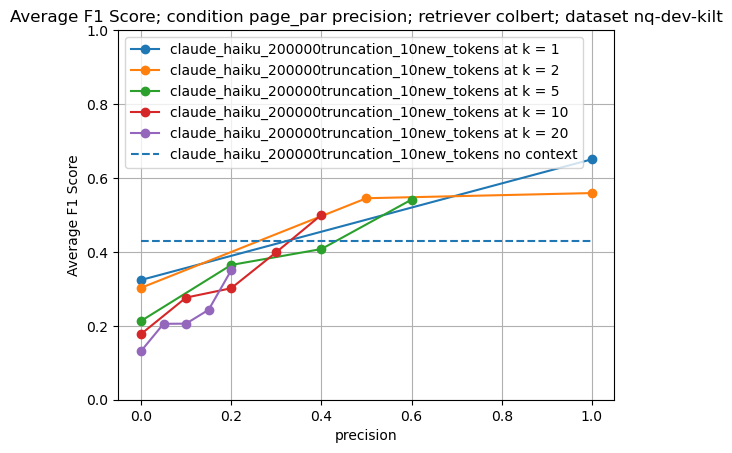

In [19]:
retriever = 'colbert'
reader_models = ['flanT5', 'flanUl2',  'llama2_7b', 'llama2_70b','gpt-3.5_16000truncation_10new_tokens', 'claude_haiku_200000truncation_10new_tokens']
dataset = 'nq-dev-kilt'
condition = 'precision'
retrieval_unit = 'page_par'
line_plot_reader_by_retriever(retriever, reader_models, dataset, condition, retrieval_unit)

loading from /data/tir/projects/tir6/general/afreens/dbqa/data/gold_compilation_files/gold_nq-dev-kilt_compilation_file.json
loading from /data/tir/projects/tir6/general/afreens/dbqa/retriever_results/evaluations/colbert/nq-dev-kilt.jsonl
flanT5 at k = 1 F1 slope: 0.4559316796381298 F1 intercept: 0.3458749894663911
flanT5 at k = 2 F1 slope: 0.3681366254829912 F1 intercept: 0.36990341167818463
flanT5 at k = 5 F1 slope: 0.3157790501058726 F1 intercept: 0.38655208661849505
flanT5 at k = 10 F1 slope: 0.28825724707493744 F1 intercept: 0.3832634225469039
flanT5 at k = 20 F1 slope: 0.27280371711945695 F1 intercept: 0.38421642653196075


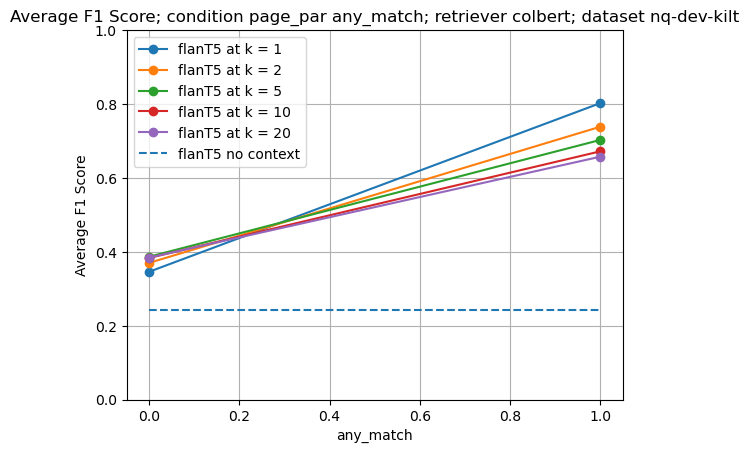

flanUl2 at k = 1 F1 slope: 0.4499673302112548 F1 intercept: 0.35300378298104296
flanUl2 at k = 2 F1 slope: 0.381497551890408 F1 intercept: 0.3690226157769648
flanUl2 at k = 5 F1 slope: 0.3255227041084879 F1 intercept: 0.3846102435379866
flanUl2 at k = 10 F1 slope: 0.3002834280661382 F1 intercept: 0.38388156068632745
flanUl2 at k = 20 F1 slope: 0.2839862948285462 F1 intercept: 0.37207365087787136


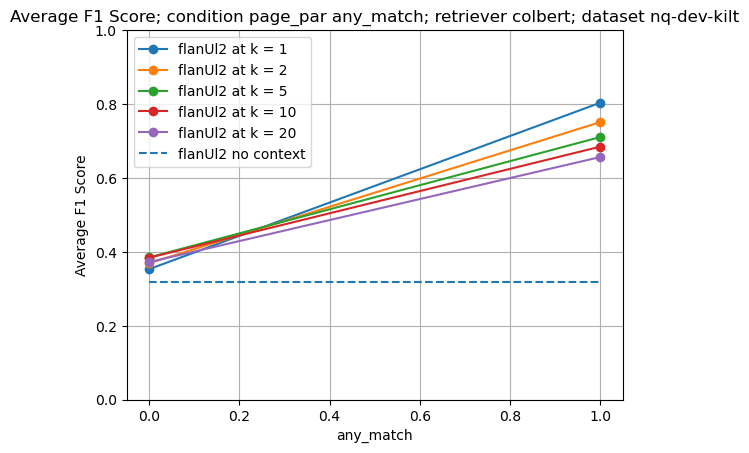

llama2_7b at k = 1 F1 slope: 0.2785015787120329 F1 intercept: 0.3531432775767767
llama2_7b at k = 2 F1 slope: 0.2256655996457841 F1 intercept: 0.33571877715327253
llama2_7b at k = 5 F1 slope: 0.17790404825447537 F1 intercept: 0.2852795946195185
llama2_7b at k = 10 F1 slope: 0.15653526516595573 F1 intercept: 0.22723955276223845
llama2_7b at k = 20 F1 slope: 0.12174698655791688 F1 intercept: 0.19112659440428598


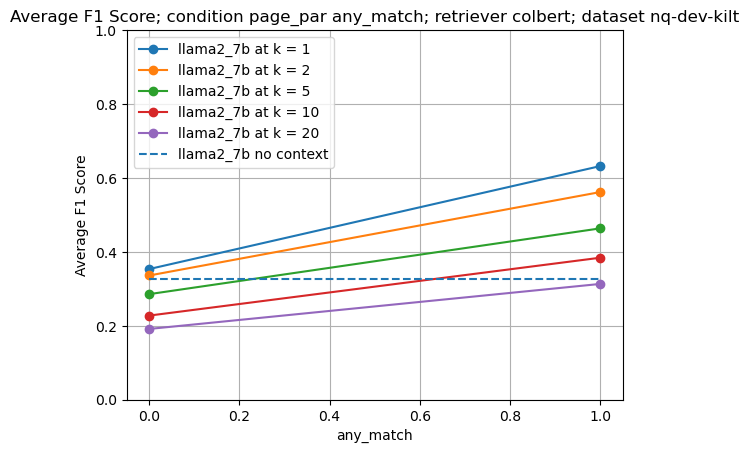

llama2_70b at k = 1 F1 slope: 0.3099389346558476 F1 intercept: 0.41088917038344336
llama2_70b at k = 2 F1 slope: 0.2452460719871417 F1 intercept: 0.4063461933691361
llama2_70b at k = 5 F1 slope: 0.22178415166947224 F1 intercept: 0.40522937117268537
llama2_70b at k = 10 F1 slope: 0.18620745721776621 F1 intercept: 0.39730834409648297
llama2_70b at k = 20 F1 slope: 0.1541678608184756 F1 intercept: 0.3550886758768281


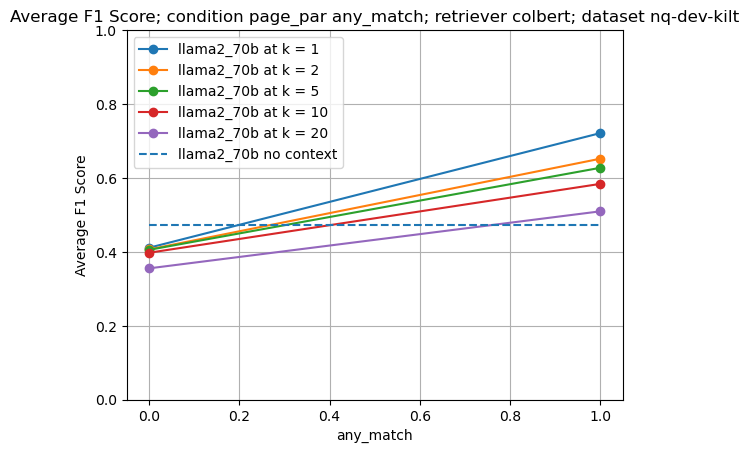

gpt-3.5_16000truncation_10new_tokens at k = 1 F1 slope: 0.36056140109470974 F1 intercept: 0.40437596657327285
gpt-3.5_16000truncation_10new_tokens at k = 2 F1 slope: 0.3191367126844202 F1 intercept: 0.3921284007614822
gpt-3.5_16000truncation_10new_tokens at k = 5 F1 slope: 0.28457477205814463 F1 intercept: 0.38811921405031913
gpt-3.5_16000truncation_10new_tokens at k = 10 F1 slope: 0.264342544836553 F1 intercept: 0.38761002485637935
gpt-3.5_16000truncation_10new_tokens at k = 20 F1 slope: 0.2571638263036377 F1 intercept: 0.38796671636074204


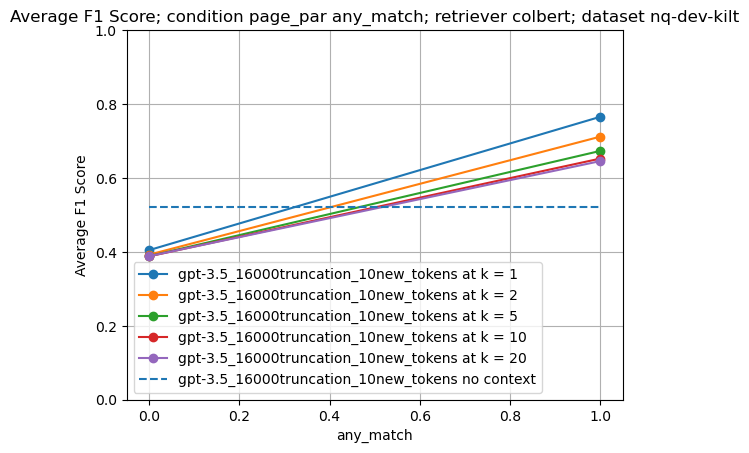

claude_haiku_200000truncation_10new_tokens at k = 1 F1 slope: 0.32659315522472515 F1 intercept: 0.3239265082881578
claude_haiku_200000truncation_10new_tokens at k = 2 F1 slope: 0.2431988518210237 F1 intercept: 0.3027545869962274
claude_haiku_200000truncation_10new_tokens at k = 5 F1 slope: 0.15929525311900392 F1 intercept: 0.21303000492711846
claude_haiku_200000truncation_10new_tokens at k = 10 F1 slope: 0.10731101921111344 F1 intercept: 0.17761980419909854
claude_haiku_200000truncation_10new_tokens at k = 20 F1 slope: 0.07654165297111012 F1 intercept: 0.13143351367388958


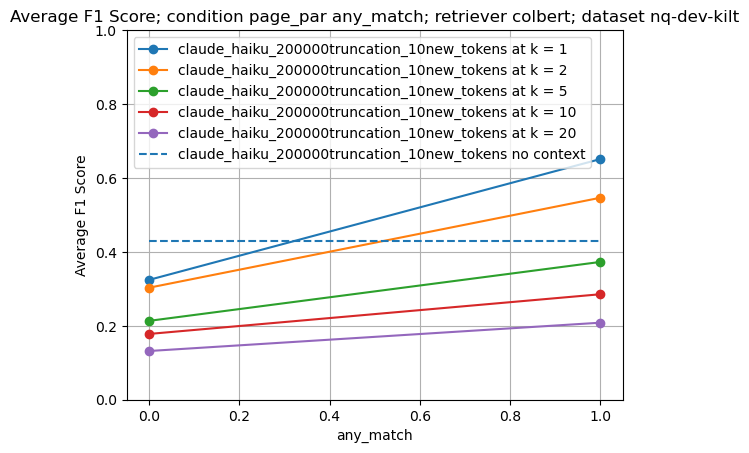

In [103]:
retriever = 'colbert'
reader_models = ['flanT5', 'flanUl2',  'llama2_7b', 'llama2_70b','gpt-3.5_16000truncation_10new_tokens', 'claude_haiku_200000truncation_10new_tokens']
dataset = 'nq-dev-kilt'
condition = 'any_match'
retrieval_unit = 'page_par'
line_plot_reader_by_retriever(retriever, reader_models, dataset, condition, retrieval_unit)

loading from /data/tir/projects/tir6/general/afreens/dbqa/data/gold_compilation_files/gold_nq-dev-kilt_compilation_file.json
loading from /data/tir/projects/tir6/general/afreens/dbqa/retriever_results/evaluations/bm25/nq-dev-kilt.jsonl
flanT5 at k = 1 F1 slope: 0.4403582623999297 F1 intercept: 0.2248482602030426
flanT5 at k = 2 F1 slope: 0.4313454624068843 F1 intercept: 0.239646441066771
flanT5 at k = 5 F1 slope: 0.3710707021302736 F1 intercept: 0.28836157097003223
flanT5 at k = 10 F1 slope: 0.3217454981576004 F1 intercept: 0.32531439658461286
flanT5 at k = 20 F1 slope: 0.29287063799216617 F1 intercept: 0.3544982480308676


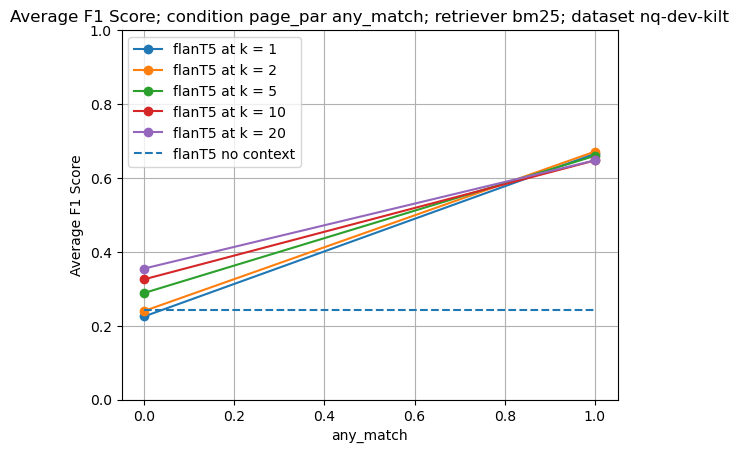

flanUl2 at k = 1 F1 slope: 0.4737454466604565 F1 intercept: 0.2234501338931123
flanUl2 at k = 2 F1 slope: 0.45366643966835396 F1 intercept: 0.2398136811840297
flanUl2 at k = 5 F1 slope: 0.37628020798590417 F1 intercept: 0.28998445858613936
flanUl2 at k = 10 F1 slope: 0.33813117936654125 F1 intercept: 0.3198929812375987
flanUl2 at k = 20 F1 slope: 0.2883525816832114 F1 intercept: 0.3490958149015218


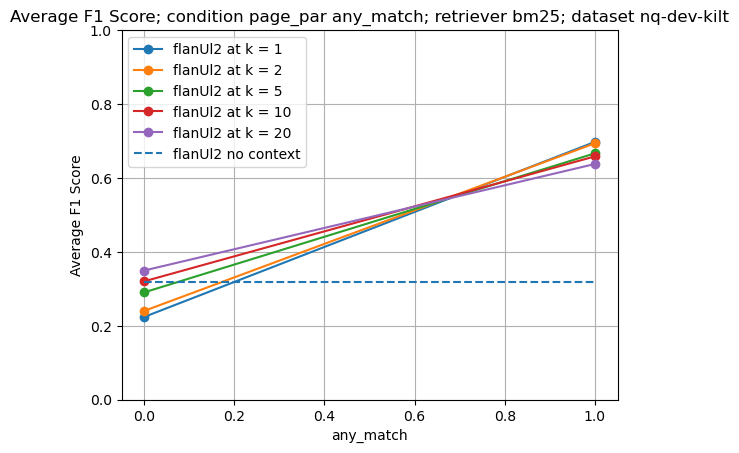

llama2_7b at k = 1 F1 slope: 0.32099607143232944 F1 intercept: 0.30190746129977963
llama2_7b at k = 2 F1 slope: 0.24954443261355308 F1 intercept: 0.2963814255620283
llama2_7b at k = 5 F1 slope: 0.18610193196221703 F1 intercept: 0.2748751319263469
llama2_7b at k = 10 F1 slope: 0.1284274776513766 F1 intercept: 0.24272286134737178
llama2_7b at k = 20 F1 slope: 0.10720536992104254 F1 intercept: 0.20484746075188623


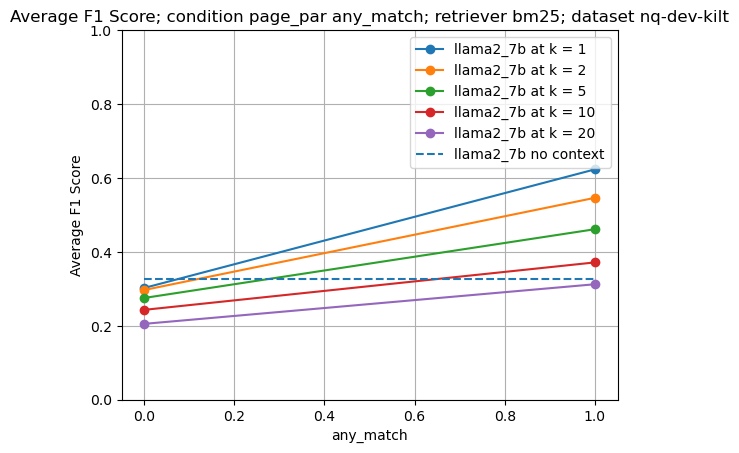

llama2_70b at k = 1 F1 slope: 0.26508046341769337 F1 intercept: 0.4032075582639934
llama2_70b at k = 2 F1 slope: 0.25014279375716675 F1 intercept: 0.408228760503181
llama2_70b at k = 5 F1 slope: 0.19541743281104973 F1 intercept: 0.42588264758798855
llama2_70b at k = 10 F1 slope: 0.15422340713336563 F1 intercept: 0.430879122378756
llama2_70b at k = 20 F1 slope: 0.1223251892146659 F1 intercept: 0.3931962242038864


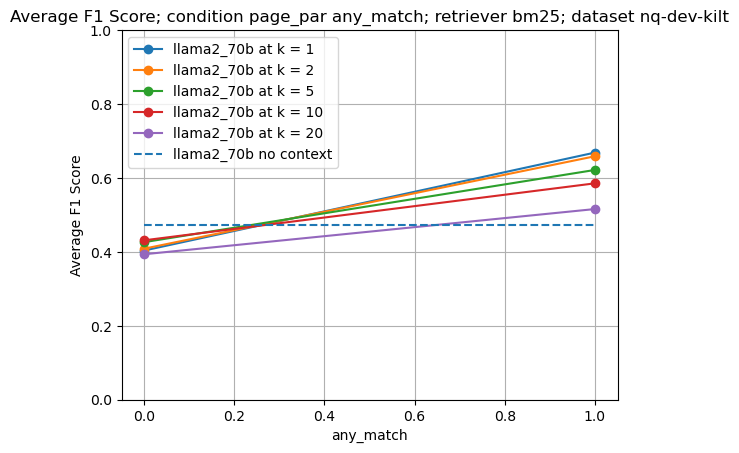

gpt-3.5_16000truncation_10new_tokens at k = 1 F1 slope: 0.3205152350139292 F1 intercept: 0.3883897653111894
gpt-3.5_16000truncation_10new_tokens at k = 2 F1 slope: 0.32036490655701433 F1 intercept: 0.3696882884231879
gpt-3.5_16000truncation_10new_tokens at k = 5 F1 slope: 0.28710554254692605 F1 intercept: 0.37733941438672497
gpt-3.5_16000truncation_10new_tokens at k = 10 F1 slope: 0.27354697626785895 F1 intercept: 0.38669358428702905
gpt-3.5_16000truncation_10new_tokens at k = 20 F1 slope: 0.250751451650438 F1 intercept: 0.38479388908530865


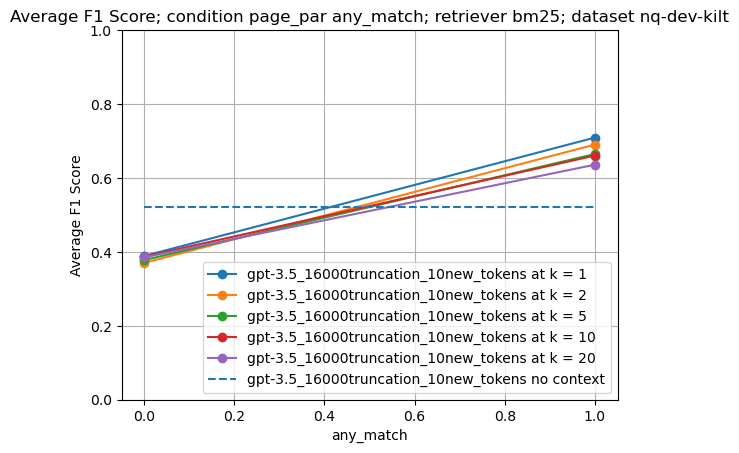

claude_haiku_200000truncation_10new_tokens at k = 1 F1 slope: 0.3260295372628455 F1 intercept: 0.2604656243802452
claude_haiku_200000truncation_10new_tokens at k = 2 F1 slope: 0.28804231352319315 F1 intercept: 0.2503515754113615
claude_haiku_200000truncation_10new_tokens at k = 5 F1 slope: 0.16812318440754603 F1 intercept: 0.19768260251530473
claude_haiku_200000truncation_10new_tokens at k = 10 F1 slope: 0.09013849006947847 F1 intercept: 0.16584596586137948
claude_haiku_200000truncation_10new_tokens at k = 20 F1 slope: 0.07221878827844369 F1 intercept: 0.12603282747537367


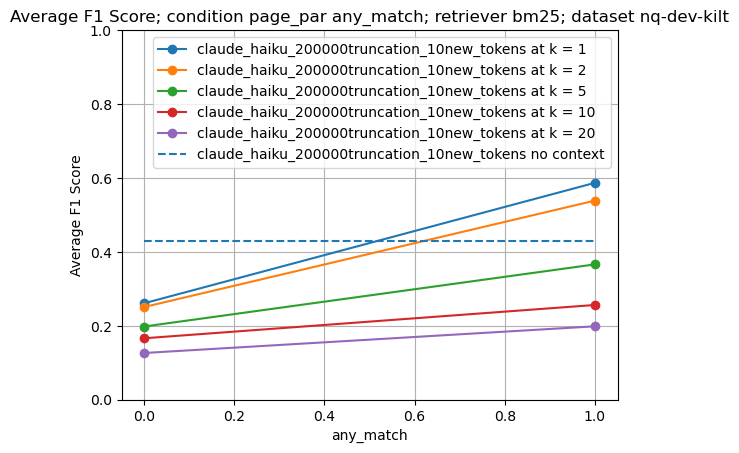

In [104]:
retriever = 'bm25'
reader_models = ['flanT5', 'flanUl2',  'llama2_7b', 'llama2_70b','gpt-3.5_16000truncation_10new_tokens', 'claude_haiku_200000truncation_10new_tokens']
dataset = 'nq-dev-kilt'
condition = 'any_match'
retrieval_unit = 'page_par'
line_plot_reader_by_retriever(retriever, reader_models, dataset, condition, retrieval_unit)

In [50]:
import matplotlib.pyplot as plt
import pandas as pd
import re

import re

def extract_nickname(s):
    if 'truncation' in s:
        # Regex pattern to capture everything up to just before the last number before "truncation"
        pattern = r"^(.*?)(\d+)(?=truncation)"

        # Search using the regex pattern
        match = re.search(pattern, s)
        if match:
            result = match.group(1).strip('_')  # Capture everything before the digits that are immediately before 'truncation'
            # print("Extracted part:", result.rstrip('_'))  # Remove any trailing underscore
        # else:
            # print("No match found.")
        return result
    return s


def plot_metrics(retrievers, readers, retrieval_mode, dataset, ytop = None, plot_together = True):
    colors = plt.get_cmap('tab10')
    color_map = {
        'recall': colors(0),        # First color from tab10
        'precision': colors(1),     # Second color from tab10
        'answer_in_context': colors(2),  # Third color from tab10
        'any_page_match': colors(3),     # Fourth color from tab10
        'any_par_match': colors(4)       # Fifth color from tab10
    }
    print(retrievers)
    
    
    if plot_together:
        fig, axes = plt.subplots(1,1)
    for j, reader in enumerate(readers):
        if not plot_together:
            fig, axes = plt.subplots(1,1)
        no_context_data = load_jsonl(f'/data/tir/projects/tir6/general/afreens/dbqa/reader_results/{reader}/{dataset}/no_context/all_data_evaluated.jsonl')
        axes.hlines(y=np.mean([d['answer_evaluation']['f1'] for d in no_context_data]), linestyle = '-.', xmin=1, xmax=50, color = colors(j%10), label='no_context')
        for retriever in retrievers:

            # colbert_results = load_jsonl(f'/data/tir/projects/tir6/general/afreens/dbqa/retriever_results/evaluations/{retriever}/{dataset}.jsonl')
            overall_colbert = load_json(f'/data/tir/projects/tir6/general/afreens/dbqa/retriever_results/evaluations/{retriever}/{dataset}_results_by_k.json')
            
            recalls = []
            precisions = []
            
            for k, v in overall_colbert.items():
                if k == '51':
                    break
                recalls.append(v['recall@k page_par_id'])
                precisions.append(v['precision@k page_par_id'])



            
            # Plot each metric with the same color but different linestyle
            axes.plot(range(1,51), recalls, linestyle = '-' if retriever == 'colbert' else '--', color = 'black', label=f'{retriever} recall')
            axes.plot(range(1,51), precisions, color = 'gray', linestyle = '-' if retriever == 'colbert' else '--', label=f'{retriever} precision')
            # axes.plot(range(1,51), answer_in_context, color=color_map['answer_in_context'], linestyle=linestyle, label=f'{retriever} answer_in_context')
            # axes.plot(range(1,51), any_page_match, color=color_map['any_page_match'], linestyle=linestyle, label=f'{retriever} any page match')
            # axes.plot(range(1,51), any_page_par_match, color=color_map['any_par_match'], linestyle=linestyle, label=f'{retriever} any par match')

        
            data = load_json(f'/data/tir/projects/tir6/general/afreens/dbqa/reader_results/{reader}/{dataset}/{retriever}/{retrieval_mode}/combined_metrics.json')
            
            # gold_data = load_json(f'/data/tir/projects/tir6/general/afreens/dbqa/reader_results/{reader}/{dataset}/gold/combined_metrics.json')
            filtered_data = {key: value for key, value in data.items() if re.match(r'^top\d+$', key)}

            df = pd.DataFrame.from_dict(filtered_data, orient='index')
            df.reset_index(inplace=True)
            # print(df['index'])
            df['k'] = df['index'].str.extract('(\d+)').astype(int)  # Extracting the number from 'topX' and converting to int
            df.drop('index', axis=1, inplace=True)
            df = df[['k', 'f1']]  # Reorder columns with 'k' first
            

            # for i, metric in enumerate(metrics):
            axes.plot(df['k'], df['f1'], marker='o', linestyle = '-' if retriever == 'colbert' else '--', color = colors(j%10), label = f'{extract_nickname(reader)} x {retriever}')  # Plot each metric
            axes.set_title('f1')  # Set the title for each subplot
            axes.set_xlabel('k')  # Set x-axis label
            axes.set_ylabel('f1')  # Set y-axis label
            axes.set_ylim(0, ytop)  # Set y-axis limits
            axes.grid(True)  # Add grid
            axes.legend(loc = 'upper right')
        plt.tight_layout()
        fig.suptitle(f'{retrieval_mode}, {dataset} ')
        if not plot_together:
            plt.show()
    if plot_together:
        plt.show()

['colbert', 'bm25']
loading from /data/tir/projects/tir6/general/afreens/dbqa/reader_results/gpt-3.5_16000truncation_10new_tokens/complete_bioasq/no_context/all_data_evaluated.jsonl
loading from /data/tir/projects/tir6/general/afreens/dbqa/retriever_results/evaluations/colbert/complete_bioasq_results_by_k.json
loading from /data/tir/projects/tir6/general/afreens/dbqa/reader_results/gpt-3.5_16000truncation_10new_tokens/complete_bioasq/colbert/top_k/combined_metrics.json
loading from /data/tir/projects/tir6/general/afreens/dbqa/retriever_results/evaluations/bm25/complete_bioasq_results_by_k.json
loading from /data/tir/projects/tir6/general/afreens/dbqa/reader_results/gpt-3.5_16000truncation_10new_tokens/complete_bioasq/bm25/top_k/combined_metrics.json


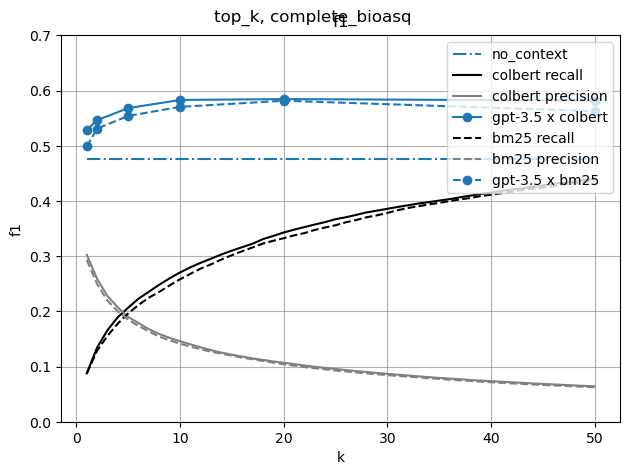

loading from /data/tir/projects/tir6/general/afreens/dbqa/reader_results/claude_haiku_200000truncation_10new_tokens/complete_bioasq/no_context/all_data_evaluated.jsonl
loading from /data/tir/projects/tir6/general/afreens/dbqa/retriever_results/evaluations/colbert/complete_bioasq_results_by_k.json
loading from /data/tir/projects/tir6/general/afreens/dbqa/reader_results/claude_haiku_200000truncation_10new_tokens/complete_bioasq/colbert/top_k/combined_metrics.json
loading from /data/tir/projects/tir6/general/afreens/dbqa/retriever_results/evaluations/bm25/complete_bioasq_results_by_k.json
loading from /data/tir/projects/tir6/general/afreens/dbqa/reader_results/claude_haiku_200000truncation_10new_tokens/complete_bioasq/bm25/top_k/combined_metrics.json


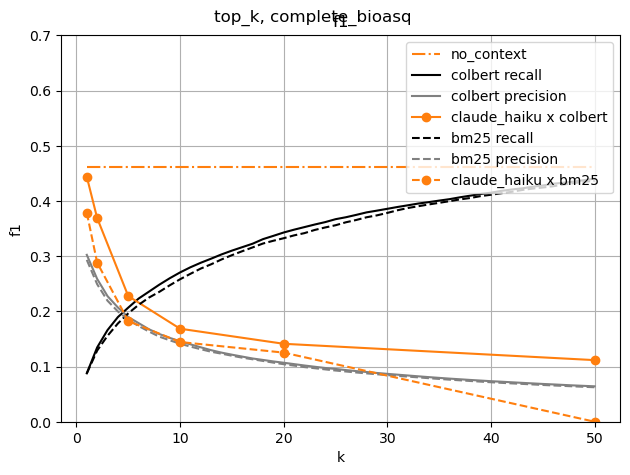

loading from /data/tir/projects/tir6/general/afreens/dbqa/reader_results/flanT5/complete_bioasq/no_context/all_data_evaluated.jsonl
loading from /data/tir/projects/tir6/general/afreens/dbqa/retriever_results/evaluations/colbert/complete_bioasq_results_by_k.json
loading from /data/tir/projects/tir6/general/afreens/dbqa/reader_results/flanT5/complete_bioasq/colbert/top_k/combined_metrics.json
loading from /data/tir/projects/tir6/general/afreens/dbqa/retriever_results/evaluations/bm25/complete_bioasq_results_by_k.json
loading from /data/tir/projects/tir6/general/afreens/dbqa/reader_results/flanT5/complete_bioasq/bm25/top_k/combined_metrics.json


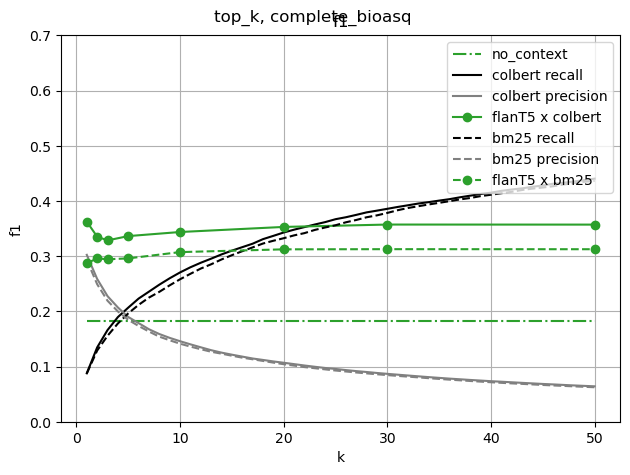

loading from /data/tir/projects/tir6/general/afreens/dbqa/reader_results/flanUl2/complete_bioasq/no_context/all_data_evaluated.jsonl
loading from /data/tir/projects/tir6/general/afreens/dbqa/retriever_results/evaluations/colbert/complete_bioasq_results_by_k.json
loading from /data/tir/projects/tir6/general/afreens/dbqa/reader_results/flanUl2/complete_bioasq/colbert/top_k/combined_metrics.json
loading from /data/tir/projects/tir6/general/afreens/dbqa/retriever_results/evaluations/bm25/complete_bioasq_results_by_k.json
loading from /data/tir/projects/tir6/general/afreens/dbqa/reader_results/flanUl2/complete_bioasq/bm25/top_k/combined_metrics.json


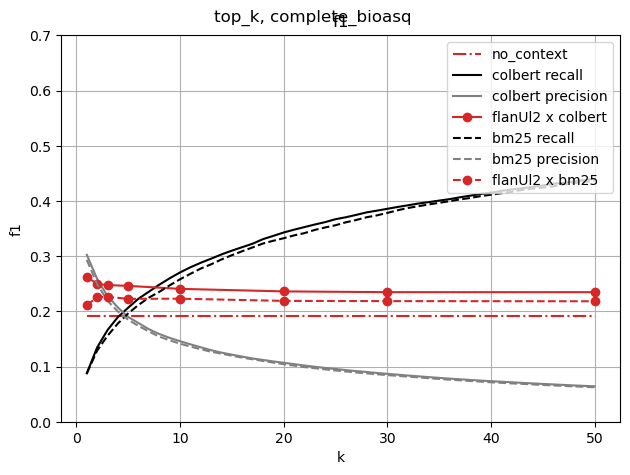

loading from /data/tir/projects/tir6/general/afreens/dbqa/reader_results/llama2_7b/complete_bioasq/no_context/all_data_evaluated.jsonl
loading from /data/tir/projects/tir6/general/afreens/dbqa/retriever_results/evaluations/colbert/complete_bioasq_results_by_k.json
loading from /data/tir/projects/tir6/general/afreens/dbqa/reader_results/llama2_7b/complete_bioasq/colbert/top_k/combined_metrics.json
loading from /data/tir/projects/tir6/general/afreens/dbqa/retriever_results/evaluations/bm25/complete_bioasq_results_by_k.json
loading from /data/tir/projects/tir6/general/afreens/dbqa/reader_results/llama2_7b/complete_bioasq/bm25/top_k/combined_metrics.json


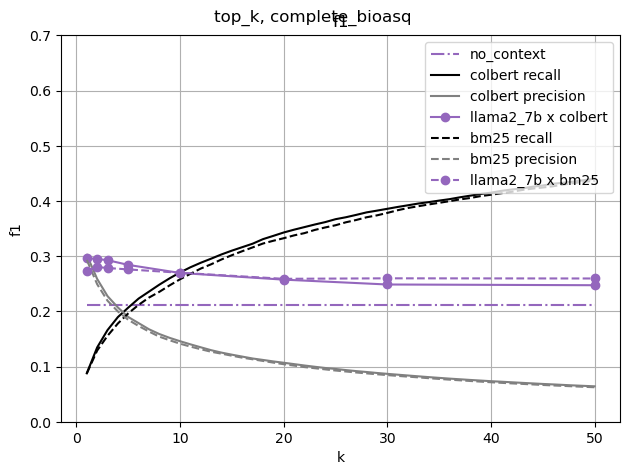

loading from /data/tir/projects/tir6/general/afreens/dbqa/reader_results/llama2_70b/complete_bioasq/no_context/all_data_evaluated.jsonl
loading from /data/tir/projects/tir6/general/afreens/dbqa/retriever_results/evaluations/colbert/complete_bioasq_results_by_k.json
loading from /data/tir/projects/tir6/general/afreens/dbqa/reader_results/llama2_70b/complete_bioasq/colbert/top_k/combined_metrics.json
loading from /data/tir/projects/tir6/general/afreens/dbqa/retriever_results/evaluations/bm25/complete_bioasq_results_by_k.json
loading from /data/tir/projects/tir6/general/afreens/dbqa/reader_results/llama2_70b/complete_bioasq/bm25/top_k/combined_metrics.json


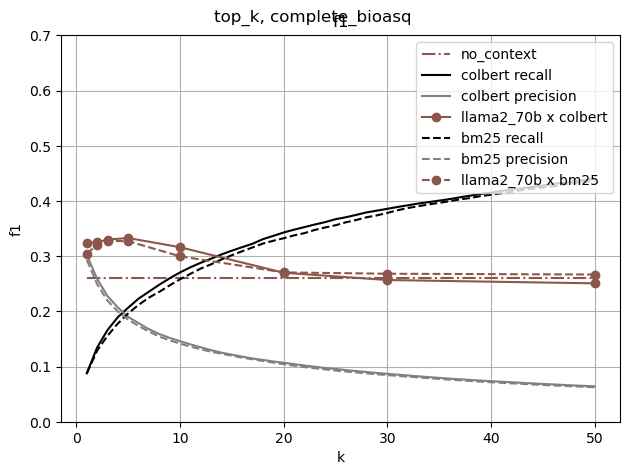

loading from /data/tir/projects/tir6/general/afreens/dbqa/reader_results/llama3_8b_8000truncation_10new_tokens/complete_bioasq/no_context/all_data_evaluated.jsonl
loading from /data/tir/projects/tir6/general/afreens/dbqa/retriever_results/evaluations/colbert/complete_bioasq_results_by_k.json
loading from /data/tir/projects/tir6/general/afreens/dbqa/reader_results/llama3_8b_8000truncation_10new_tokens/complete_bioasq/colbert/top_k/combined_metrics.json
loading from /data/tir/projects/tir6/general/afreens/dbqa/retriever_results/evaluations/bm25/complete_bioasq_results_by_k.json
loading from /data/tir/projects/tir6/general/afreens/dbqa/reader_results/llama3_8b_8000truncation_10new_tokens/complete_bioasq/bm25/top_k/combined_metrics.json


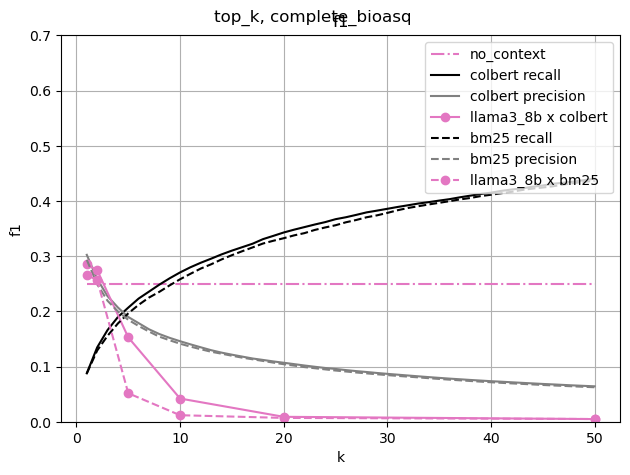

loading from /data/tir/projects/tir6/general/afreens/dbqa/reader_results/llama3_70b_8000truncation_10new_tokens/complete_bioasq/no_context/all_data_evaluated.jsonl
loading from /data/tir/projects/tir6/general/afreens/dbqa/retriever_results/evaluations/colbert/complete_bioasq_results_by_k.json
loading from /data/tir/projects/tir6/general/afreens/dbqa/reader_results/llama3_70b_8000truncation_10new_tokens/complete_bioasq/colbert/top_k/combined_metrics.json
loading from /data/tir/projects/tir6/general/afreens/dbqa/retriever_results/evaluations/bm25/complete_bioasq_results_by_k.json
loading from /data/tir/projects/tir6/general/afreens/dbqa/reader_results/llama3_70b_8000truncation_10new_tokens/complete_bioasq/bm25/top_k/combined_metrics.json


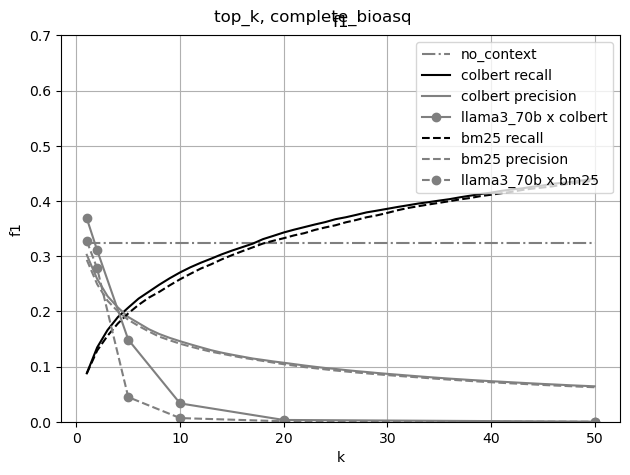

In [51]:
dataset = 'complete_bioasq'
ytop = 0.7
readers = ['gpt-3.5_16000truncation_10new_tokens', 'claude_haiku_200000truncation_10new_tokens', 'flanT5', 'flanUl2', 'llama2_7b', 'llama2_70b','llama3_8b_8000truncation_10new_tokens','llama3_70b_8000truncation_10new_tokens']
retrieval_mode = 'top_k'
plot_metrics(['colbert','bm25'], readers, retrieval_mode, dataset, ytop, plot_together = False)


['colbert', 'bm25']
loading from /data/tir/projects/tir6/general/afreens/dbqa/reader_results/gpt-3.5_16000truncation_10new_tokens/hotpotqa/colbert/top_k/combined_metrics.json
loading from /data/tir/projects/tir6/general/afreens/dbqa/reader_results/claude_haiku_200000truncation_10new_tokens/hotpotqa/colbert/top_k/combined_metrics.json
loading from /data/tir/projects/tir6/general/afreens/dbqa/reader_results/flanT5/hotpotqa/colbert/top_k/combined_metrics.json
loading from /data/tir/projects/tir6/general/afreens/dbqa/reader_results/flanUl2/hotpotqa/colbert/top_k/combined_metrics.json
loading from /data/tir/projects/tir6/general/afreens/dbqa/reader_results/llama2_7b/hotpotqa/colbert/top_k/combined_metrics.json
loading from /data/tir/projects/tir6/general/afreens/dbqa/reader_results/llama2_70b/hotpotqa/colbert/top_k/combined_metrics.json
loading from /data/tir/projects/tir6/general/afreens/dbqa/reader_results/llama3_8b_8000truncation_10new_tokens/hotpotqa/colbert/top_k/combined_metrics.json


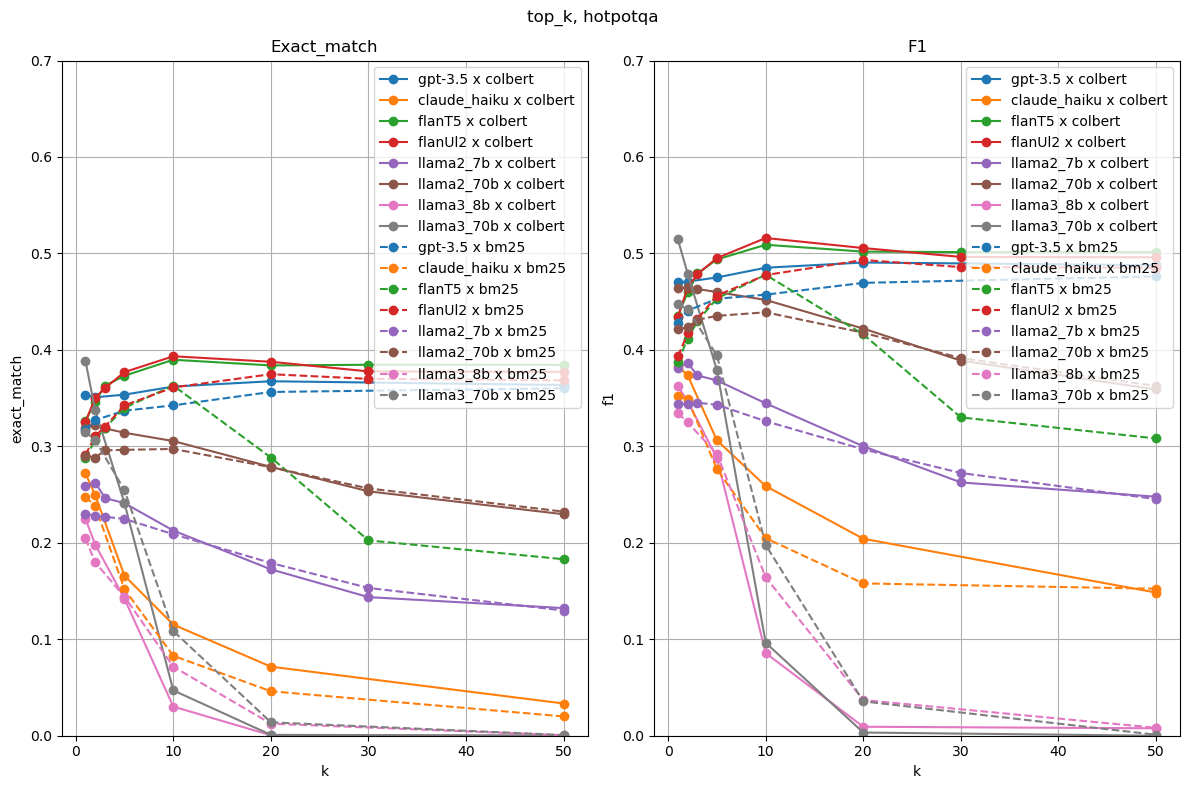

In [51]:
dataset = 'hotpotqa'
ytop = 0.7
readers = ['gpt-3.5_16000truncation_10new_tokens', 'claude_haiku_200000truncation_10new_tokens', 'flanT5', 'flanUl2', 'llama2_7b', 'llama2_70b','llama3_8b_8000truncation_10new_tokens','llama3_70b_8000truncation_10new_tokens']
# retriever = 'bm25'
retrieval_mode = 'top_k'
# fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))
# axes = axes.flatten()  # Adjust subplot grid and size as needed
plot_metrics(['colbert','bm25'], readers, retrieval_mode, dataset, ytop)

['colbert', 'bm25']
loading from /data/tir/projects/tir6/general/afreens/dbqa/reader_results/gpt-3.5_16000truncation_10new_tokens/complete_bioasq/colbert/top_k/combined_metrics.json
loading from /data/tir/projects/tir6/general/afreens/dbqa/reader_results/claude_haiku_200000truncation_10new_tokens/complete_bioasq/colbert/top_k/combined_metrics.json
loading from /data/tir/projects/tir6/general/afreens/dbqa/reader_results/flanT5/complete_bioasq/colbert/top_k/combined_metrics.json
loading from /data/tir/projects/tir6/general/afreens/dbqa/reader_results/flanUl2/complete_bioasq/colbert/top_k/combined_metrics.json
loading from /data/tir/projects/tir6/general/afreens/dbqa/reader_results/llama2_7b/complete_bioasq/colbert/top_k/combined_metrics.json
loading from /data/tir/projects/tir6/general/afreens/dbqa/reader_results/llama2_70b/complete_bioasq/colbert/top_k/combined_metrics.json
loading from /data/tir/projects/tir6/general/afreens/dbqa/reader_results/llama3_8b_8000truncation_10new_tokens/com

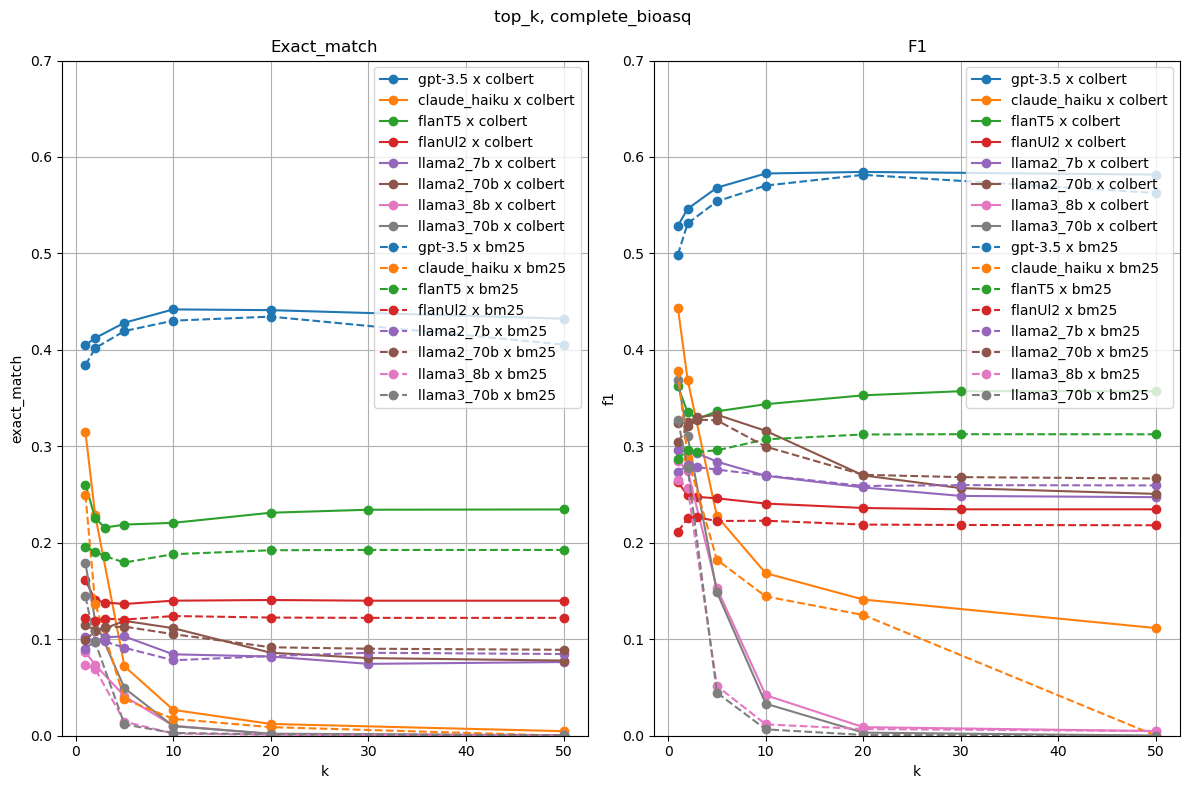

In [52]:
dataset = 'complete_bioasq'
ytop = 0.7
readers = ['gpt-3.5_16000truncation_10new_tokens', 'claude_haiku_200000truncation_10new_tokens', 'flanT5', 'flanUl2', 'llama2_7b', 'llama2_70b','llama3_8b_8000truncation_10new_tokens','llama3_70b_8000truncation_10new_tokens']
# retriever = 'bm25'
retrieval_mode = 'top_k'
# fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))
# axes = axes.flatten()  # Adjust subplot grid and size as needed
plot_metrics(['colbert','bm25'], readers, retrieval_mode, dataset, ytop)